In [431]:
import pandas as pd
import glob
import re
import os
import requests
import time
from tqdm import tqdm


df_s = pd.read_csv("article_data.csv", sep=",", header=0)
#parse out beginning page
df_s[['BP', 'EP']] = df_s['pages'].str.split('-', expand=True)
#df_s = pd.read_csv(soc10_d, sep=",", header4=0, usecols = ["journal","volume", "issue", "pages"])
df_s

,artid,journal,volume,issue,year,month,pages,cited3,cited2012,aut_num,...,bip_avgdegree,aut_flowhier,ack_flowhier,com_flowhier,aut_numcomp,ack_numcomp,com_numcomp,bip_numcomp,BP,EP
0,1,annurevisoci,35,1,2009,6,1-19,0,0,1,...,0.000000,99.0,99.0,99.000000,1,0,1,1,1,19
1,2,annurevisoci,35,1,2009,6,21-42,15,15,1,...,0.000000,99.0,99.0,99.000000,1,0,1,1,21,42
2,3,annurevisoci,35,1,2009,6,43-65,17,21,2,...,0.777778,1.0,0.2,0.277778,1,3,3,5,43,65
3,4,annurevisoci,35,1,2009,6,67-85,6,7,1,...,0.666667,99.0,99.0,0.000000,1,2,2,2,67,85
4,5,annurevisoci,35,1,2009,6,87-105,18,18,2,...,0.000000,0.0,99.0,0.000000,1,0,1,2,87,105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3593,3746,amersocirevi,65,1,2000,2,122-127,3,21,3,...,4.250000,0.0,99.0,0.000000,1,1,1,1,122,127
3594,3747,amersocirevi,65,1,2000,2,138-167,8,54,1,...,0.333333,99.0,99.0,0.000000,1,5,5,5,138,167
3595,3748,amersocirevi,65,1,2000,2,128-137,1,7,4,...,0.000000,1.0,99.0,1.000000,3,1,4,5,128,137
3596,3749,amersocirevi,65,1,2000,2,96-116,16,186,3,...,4.250000,0.0,99.0,0.000000,1,1,1,1,96,116


In [432]:

wos_meta_d = "WoS_sociology_metadata_2000_2009/"
dfs = []
for r, d, f0 in os.walk(wos_meta_d):
    for fname in f0:
        if "txt" in fname:
            df0 = pd.read_csv( os.path.join(wos_meta_d,fname), sep='\t', header=0, dtype={"BP":str, "EP":str} )
            dfs.append(df0)
df = pd.concat(dfs)
df = df.reset_index(drop=True)
df

,PT,AU,BA,CA,GP,RI,OI,BE,Z2,AU.1,...,DG,C1,C3,EC,DE,DA,UT,PM,Unnamed: 78,Publication Type
0,J,"Hallinan, Maureen T.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2008-07-01,WOS:000258547900003,NaN,NaN,NaN
1,J,"Jasper, James M.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2008-07-01,WOS:000258833100019,NaN,NaN,NaN
2,J,"Jean, Peter K. B. St.; Weitzer, Ronald",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2008-07-01,WOS:000258833100017,NaN,NaN,NaN
3,J,"Kaminski, Elizabeth",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2008-07-01,WOS:000258833100020,NaN,NaN,NaN
4,J,"Kempner, Joanna",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2008-07-01,WOS:000258833100010,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6311,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dissertation and Thesis Subjects
6312,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Author Keywords
6313,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Indexed Date
6314,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UT (Unique ID)


In [433]:

for idx, c in enumerate(df.columns):
    print(idx+1, c)


1 PT
2 AU
3 BA
4 CA
5 GP
6 RI
7 OI
8 BE
9 Z2
10 AU.1
11 AA
12 TI
13 X1
14 Y1
15 Z1
16 FT
17 PN
18 AE
19 Z3
20 SO
21 S1
22 SE
23 BS
24 VL
25 IS
26 SI
27 MA
28 BP
29 EP
30 AR
31 VN
32 VH
33 DI
34 D2
35 L1
36 L2
37 L3
38 EA
39 SU
40 DT
41 PD
42 PY
43 AB
44 X4
45 Y4
46 Z4
47 AK
48 CT
49 CY
50 SP
51 CL
52 TC
53 Z8
54 ZR
55 ZA
56 ZB
57 ZS
58 Z9
59 U1
60 U2
61 SN
62 EI
63 BN
64 G1
65 NR
66 CR
67 LA
68 AS
69 AC
70 CG
71 DG
72 C1
73 C3
74 EC
75 DE
76 DA
77 UT
78 PM
79 Unnamed: 78
80 Publication Type


In [434]:

df1 = df[["DI", "D2", "AU","TI","SO","PY","VL","IS","BP","EP"]] # DOI, Authors, Title, Source, Publication Year, Volume, Issue, Begin Page, End Page
df1["pages"] = df1['BP'].astype(str) + '-' + df1['EP'].astype(str)
df1[df1["DI"].isna()]


<ipython-input-434-d31685ecafe3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["pages"] = df1['BP'].astype(str) + '-' + df1['EP'].astype(str)


,DI,D2,AU,TI,SO,PY,VL,IS,BP,EP,pages
2,NaN,NaN,"Jean, Peter K. B. St.; Weitzer, Ronald",Race and Policing in America: Conflict and reform,AMERICAN JOURNAL OF SOCIOLOGY,2008.0,114.0,1.0,254,256,254-256
31,NaN,NaN,"Ben-Yehuda, Nachman",The path of the devil: Early modern witch hunts,SOCIAL FORCES,2008.0,86.0,4.0,1844,1845,1844-1845
36,NaN,NaN,"Cadge, Wendy",Straight to Jesus: Sexual and Christian conver...,SOCIAL FORCES,2008.0,86.0,4.0,1841,1843,1841-1843
39,NaN,NaN,"Collins, Patricia Hill",Party/politics: Horizons in black political th...,SOCIAL FORCES,2008.0,86.0,4.0,1865,1867,1865-1867
40,NaN,NaN,"Crowley, Martha",From hire to liar: The role of deception in th...,SOCIAL FORCES,2008.0,86.0,4.0,1867,1869,1867-1869
...,...,...,...,...,...,...,...,...,...,...,...
6311,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan-nan
6312,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan-nan
6313,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan-nan
6314,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan-nan


In [435]:

df_join = df_s.merge(df1, left_on = ["year","volume", "issue", "BP"], right_on=["PY","VL","IS","BP"], how="left")
df_join



,artid,journal,volume,issue,year,month,pages_x,cited3,cited2012,aut_num,...,DI,D2,AU,TI,SO,PY,VL,IS,EP_y,pages_y
0,1,annurevisoci,35,1,2009,6,1-19,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,annurevisoci,35,1,2009,6,21-42,15,15,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,annurevisoci,35,1,2009,6,43-65,17,21,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,annurevisoci,35,1,2009,6,67-85,6,7,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,annurevisoci,35,1,2009,6,87-105,18,18,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3603,3746,amersocirevi,65,1,2000,2,122-127,3,21,3,...,10.2307/2657293,NaN,"Frank, DJ; Hironaka, A; Schofer, E",Environmentalism as a global institution -: <i...,AMERICAN SOCIOLOGICAL REVIEW,2000.0,65.0,1.0,127,122-127
3604,3747,amersocirevi,65,1,2000,2,138-167,8,54,1,...,10.2307/2657295,NaN,"Gorski, PS",Historicizing the secularization debate: Churc...,AMERICAN SOCIOLOGICAL REVIEW,2000.0,65.0,1.0,167,138-167
3605,3748,amersocirevi,65,1,2000,2,128-137,1,7,4,...,10.2307/2657294,NaN,"Horton, HD; Allen, BL; Herring, C; Thomas, ME",Lost in the storm: The sociology of the black ...,AMERICAN SOCIOLOGICAL REVIEW,2000.0,65.0,1.0,137,128-137
3606,3749,amersocirevi,65,1,2000,2,96-116,16,186,3,...,10.2307/2657291,NaN,"Frank, DJ; Hironaka, A; Schofer, E",The nation-state and the natural environment o...,AMERICAN SOCIOLOGICAL REVIEW,2000.0,65.0,1.0,116,96-116


In [436]:
df1.groupby("SO").count()

,DI,D2,AU,TI,PY,VL,IS,BP,EP,pages
SO,,,,,,,,,,
AMERICAN JOURNAL OF SOCIOLOGY,1893,0,1989,1989,1989,1989,1978,1989,1989,1989
AMERICAN SOCIOLOGICAL REVIEW,465,0,481,481,481,481,481,481,481,481
ANNUAL REVIEW OF SOCIOLOGY,233,0,234,239,239,239,0,239,239,239
JOURNAL OF MARRIAGE AND FAMILY,922,0,1100,1100,1100,1100,1100,1092,1092,1100
JOURNAL OF SUSTAINABLE AGRICULTURE,1,0,1,1,1,1,1,1,1,1
SOCIAL FORCES,945,0,1189,1189,1189,1189,1189,1187,1187,1189
SOCIAL NETWORKS,252,0,252,252,252,252,252,252,252,252
SOCIAL SCIENCE RESEARCH,439,0,443,443,443,443,443,443,443,443
"SOCIOLOGICAL METHODOLOGY 2000, VOL 30",7,0,8,8,8,8,0,8,8,8


In [437]:
na = df_join[df_join["DI"].isna()]

In [438]:
na = na.reset_index()
na

,index,artid,journal,volume,issue,year,month,pages_x,cited3,cited2012,...,DI,D2,AU,TI,SO,PY,VL,IS,EP_y,pages_y
0,0,1,annurevisoci,35,1,2009,6,1-19,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,annurevisoci,35,1,2009,6,21-42,15,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,3,annurevisoci,35,1,2009,6,43-65,17,21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,4,annurevisoci,35,1,2009,6,67-85,6,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,5,annurevisoci,35,1,2009,6,87-105,18,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579,3578,3721,socimeth,30,0,2000,6,1-28,2,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
580,3579,3722,socimeth,30,0,2000,6,237-260,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
581,3580,3723,socimeth,30,0,2000,6,261-315,0,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
582,3581,3724,socimeth,30,0,2000,6,165-202,2,73,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [439]:
na_new = na.merge(df1, left_on = ["year","volume", "BP"], right_on=["PY","VL","BP"], how="left")
na_new = na_new.reset_index(drop=True)
na_new

,index,artid,journal,volume,issue,year,month,pages_x,cited3,cited2012,...,DI_y,D2_y,AU_y,TI_y,SO_y,PY_y,VL_y,IS_y,EP,pages
0,0,1,annurevisoci,35,1,2009,6,1-19,0,0,...,NaN,NaN,NaN,ANNUAL REVIEW OF SOCIOLOGY,ANNUAL REVIEW OF SOCIOLOGY,2009.0,35.0,NaN,608,1-608
1,0,1,annurevisoci,35,1,2009,6,1-19,0,0,...,10.1146/annurev-soc-070308-115936,NaN,"Gans, Herbert J.",Working in Six Research Areas: A Multi-Field S...,ANNUAL REVIEW OF SOCIOLOGY,2009.0,35.0,NaN,19,1-19
2,1,2,annurevisoci,35,1,2009,6,21-42,15,15,...,10.1146/annurev-soc-070308-115916,NaN,"Brubaker, Rogers","Ethnicity, Race, and Nationalism",ANNUAL REVIEW OF SOCIOLOGY,2009.0,35.0,NaN,42,21-42
3,2,3,annurevisoci,35,1,2009,6,43-65,17,21,...,10.1146/annurev-soc-070308-115954,NaN,"Jacobs, Jerry A.; Frickel, Scott",Interdisciplinarity: A Critical Assessment,ANNUAL REVIEW OF SOCIOLOGY,2009.0,35.0,NaN,65,43-65
4,3,4,annurevisoci,35,1,2009,6,67-85,6,7,...,10.1146/annurev.soc.34.040507.134631,NaN,"Andersen, Robert",Nonparametric Methods for Modeling Nonlinearit...,ANNUAL REVIEW OF SOCIOLOGY,2009.0,35.0,NaN,85,67-85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,3578,3721,socimeth,30,0,2000,6,1-28,2,4,...,NaN,NaN,"Arminger, G; Clogg, CC; Cheng, TW",Regression analysis of multivariate binary res...,"SOCIOLOGICAL METHODOLOGY 2000, VOL 30",2000.0,30.0,NaN,26,1-26
607,3579,3722,socimeth,30,0,2000,6,237-260,0,1,...,10.1111/0081-1750.00080,NaN,"Hoem, JM",Systematic patterns of zero exposures in event...,"SOCIOLOGICAL METHODOLOGY 2000, VOL 30",2000.0,30.0,NaN,259,237-259
608,3580,3723,socimeth,30,0,2000,6,261-315,0,12,...,10.1111/0081-1750.00081,NaN,"Montgomery, JD","The self as a fuzzy set of roles, role theory ...","SOCIOLOGICAL METHODOLOGY 2000, VOL 30",2000.0,30.0,NaN,314,261-314
609,3581,3724,socimeth,30,0,2000,6,165-202,2,73,...,10.1111/0081-1750.00078,NaN,"Yuan, KH; Bentler, PM",Three likelihood-based methods for mean and co...,"SOCIOLOGICAL METHODOLOGY 2000, VOL 30",2000.0,30.0,NaN,200,165-200


In [440]:
na_new[na_new["DI_y"].isna()]

,index,artid,journal,volume,issue,year,month,pages_x,cited3,cited2012,...,DI_y,D2_y,AU_y,TI_y,SO_y,PY_y,VL_y,IS_y,EP,pages
0,0,1,annurevisoci,35,1,2009,6,1-19,0,0,...,NaN,NaN,NaN,ANNUAL REVIEW OF SOCIOLOGY,ANNUAL REVIEW OF SOCIOLOGY,2009.0,35.0,NaN,608,1-608
28,27,28,annurevisoci,34,1,2008,6,1-13,3,3,...,NaN,NaN,NaN,ANNUAL REVIEW OF SOCIOLOGY,ANNUAL REVIEW OF SOCIOLOGY,2008.0,34.0,NaN,540,1-540
51,49,50,annurevisoci,33,1,2007,6,1-19,3,7,...,NaN,NaN,NaN,ANNUAL REVIEW OF SOCIOLOGY,ANNUAL REVIEW OF SOCIOLOGY,2007.0,33.0,NaN,593,1-593
77,74,75,annurevisoci,32,1,2006,6,1-23,0,0,...,NaN,NaN,NaN,ANNUAL REVIEW OF SOCIOLOGY,ANNUAL REVIEW OF SOCIOLOGY,2006.0,32.0,NaN,500,1-500
97,93,94,annurevisoci,31,1,2005,6,1-24,3,10,...,NaN,NaN,NaN,ANNUAL REVIEW OF SOCIOLOGY,ANNUAL REVIEW OF SOCIOLOGY,2005.0,31.0,NaN,438,1-438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584,3447,3590,socsciresearch,31,3,2002,9,334-363,4,20,...,NaN,NaN,"Robison, KK; Crenshaw, EM",Post-industrial transformations and cyber-spac...,SOCIAL SCIENCE RESEARCH,2002.0,31.0,3.0,363,334-363
585,3545,3688,socialforces,79,1,2000,9,1-28,2,8,...,NaN,NaN,"Tittle, CR; Rotolo, T",IQ and stratification: An empirical evaluation...,SOCIAL FORCES,2000.0,79.0,1.0,28,1-28
586,3554,3697,socialforces,78,4,2000,6,1227-1276,2,16,...,NaN,NaN,"Rytina, S",Is occupational mobility declining in the US?,SOCIAL FORCES,2000.0,78.0,4.0,1276,1227-1276
591,3563,3706,socimeth,35,0,2005,8,1-97,17,59,...,NaN,NaN,NaN,"Sociological Methodology 2005, Vol 35","SOCIOLOGICAL METHODOLOGY 2005, VOL 35",2005.0,35.0,NaN,348,1-348


In [441]:
#na_new["DI_y"]
na_new[na_new["DI_x"].isna()]
na_new.columns

Index(['index', 'artid', 'journal', 'volume', 'issue', 'year', 'month',
       'pages_x', 'cited3', 'cited2012', 'aut_num', 'ack_num', 'com_num',
       'aut_cluster', 'ack_cluster', 'com_cluster', 'bip_cluster',
       'aut_jaccard', 'ack_jaccard', 'com_jaccard', 'aut_density',
       'ack_density', 'com_density', 'bip_density', 'aut_avgdegree',
       'ack_avgdegree', 'com_avgdegree', 'bip_avgdegree', 'aut_flowhier',
       'ack_flowhier', 'com_flowhier', 'aut_numcomp', 'ack_numcomp',
       'com_numcomp', 'bip_numcomp', 'BP', 'EP_x', 'DI_x', 'D2_x', 'AU_x',
       'TI_x', 'SO_x', 'PY_x', 'VL_x', 'IS_x', 'EP_y', 'pages_y', 'DI_y',
       'D2_y', 'AU_y', 'TI_y', 'SO_y', 'PY_y', 'VL_y', 'IS_y', 'EP', 'pages'],
      dtype='object')

In [442]:
na_new.columns


Index(['index', 'artid', 'journal', 'volume', 'issue', 'year', 'month',
       'pages_x', 'cited3', 'cited2012', 'aut_num', 'ack_num', 'com_num',
       'aut_cluster', 'ack_cluster', 'com_cluster', 'bip_cluster',
       'aut_jaccard', 'ack_jaccard', 'com_jaccard', 'aut_density',
       'ack_density', 'com_density', 'bip_density', 'aut_avgdegree',
       'ack_avgdegree', 'com_avgdegree', 'bip_avgdegree', 'aut_flowhier',
       'ack_flowhier', 'com_flowhier', 'aut_numcomp', 'ack_numcomp',
       'com_numcomp', 'bip_numcomp', 'BP', 'EP_x', 'DI_x', 'D2_x', 'AU_x',
       'TI_x', 'SO_x', 'PY_x', 'VL_x', 'IS_x', 'EP_y', 'pages_y', 'DI_y',
       'D2_y', 'AU_y', 'TI_y', 'SO_y', 'PY_y', 'VL_y', 'IS_y', 'EP', 'pages'],
      dtype='object')

In [443]:
na_join1 = na_new[['artid','DI_y', 'journal', 'volume', 'issue', 'year', 'month',
                   'cited3', 'cited2012', 'aut_num', 'ack_num', 'com_num',
       'aut_cluster', 'ack_cluster', 'com_cluster', 'bip_cluster',
       'aut_jaccard', 'ack_jaccard', 'com_jaccard', 'aut_density',
       'ack_density', 'com_density', 'bip_density', 'aut_avgdegree',
       'ack_avgdegree', 'com_avgdegree', 'bip_avgdegree', 'aut_flowhier',
       'ack_flowhier', 'com_flowhier', 'aut_numcomp', 'ack_numcomp',
       'com_numcomp', 'bip_numcomp', 'BP', 'EP_x', 'pages']]
na_join1 = na_join1.rename(columns = {'EP_x':'EP', 'DI_y':'DI'})
na_join1

,artid,DI,journal,volume,issue,year,month,cited3,cited2012,aut_num,...,aut_flowhier,ack_flowhier,com_flowhier,aut_numcomp,ack_numcomp,com_numcomp,bip_numcomp,BP,EP,pages
0,1,NaN,annurevisoci,35,1,2009,6,0,0,1,...,99.0,99.0,99.000000,1,0,1,1,1,19,1-608
1,1,10.1146/annurev-soc-070308-115936,annurevisoci,35,1,2009,6,0,0,1,...,99.0,99.0,99.000000,1,0,1,1,1,19,1-19
2,2,10.1146/annurev-soc-070308-115916,annurevisoci,35,1,2009,6,15,15,1,...,99.0,99.0,99.000000,1,0,1,1,21,42,21-42
3,3,10.1146/annurev-soc-070308-115954,annurevisoci,35,1,2009,6,17,21,2,...,1.0,0.2,0.277778,1,3,3,5,43,65,43-65
4,4,10.1146/annurev.soc.34.040507.134631,annurevisoci,35,1,2009,6,6,7,1,...,99.0,99.0,0.000000,1,2,2,2,67,85,67-85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,3721,NaN,socimeth,30,0,2000,6,2,4,3,...,99.0,99.0,99.000000,3,0,3,3,1,28,1-26
607,3722,10.1111/0081-1750.00080,socimeth,30,0,2000,6,0,1,1,...,99.0,99.0,99.000000,1,0,1,1,237,260,237-259
608,3723,10.1111/0081-1750.00081,socimeth,30,0,2000,6,0,12,1,...,99.0,99.0,99.000000,1,2,3,3,261,315,261-314
609,3724,10.1111/0081-1750.00078,socimeth,30,0,2000,6,2,73,2,...,0.0,99.0,0.000000,1,0,1,2,165,202,165-200


In [444]:
ya = df_join[(df_join["DI"].isna()==False) & (df_join["pages_x"].isna()==False)]
ya1 = ya[['artid', 'DI', 'journal', 'volume', 'issue', 'year', 'month', 'pages_x',
       'cited3', 'cited2012', 'aut_num', 'ack_num', 'com_num', 'aut_cluster',
       'ack_cluster', 'com_cluster', 'bip_cluster', 'aut_jaccard',
       'ack_jaccard', 'com_jaccard', 'aut_density', 'ack_density',
       'com_density', 'bip_density', 'aut_avgdegree', 'ack_avgdegree',
       'com_avgdegree', 'bip_avgdegree', 'aut_flowhier', 'ack_flowhier',
       'com_flowhier', 'aut_numcomp', 'ack_numcomp', 'com_numcomp',
       'bip_numcomp', 'BP', 'EP_x']]
ya1 = ya1.rename(columns={'pages_x':'pages', 'EP_x':'EP'})
ya1

,artid,DI,journal,volume,issue,year,month,pages,cited3,cited2012,...,bip_avgdegree,aut_flowhier,ack_flowhier,com_flowhier,aut_numcomp,ack_numcomp,com_numcomp,bip_numcomp,BP,EP
233,234,10.1177/000312240907400505,amersocirevi,74,5,2009,10,777-799,28,29,...,0.000000,1.0,99.000000,1.000000,1,1,2,4,777,799
234,235,10.1177/000312240907400504,amersocirevi,74,5,2009,10,756-776,12,12,...,0.000000,99.0,1.000000,1.000000,1,3,4,6,756,776
235,236,10.1177/000312240907400506,amersocirevi,74,5,2009,10,800-820,15,15,...,1.875000,0.0,0.333333,0.086957,1,4,2,3,800,820
236,237,10.1177/000312240907400502,amersocirevi,74,5,2009,10,709-730,16,16,...,0.000000,99.0,99.000000,99.000000,1,0,1,1,709,730
237,238,10.1177/000312240907400501,amersocirevi,74,5,2009,10,683-708,7,8,...,0.833333,99.0,0.250000,0.111111,1,3,3,4,683,708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3603,3746,10.2307/2657293,amersocirevi,65,1,2000,2,122-127,3,21,...,4.250000,0.0,99.000000,0.000000,1,1,1,1,122,127
3604,3747,10.2307/2657295,amersocirevi,65,1,2000,2,138-167,8,54,...,0.333333,99.0,99.000000,0.000000,1,5,5,5,138,167
3605,3748,10.2307/2657294,amersocirevi,65,1,2000,2,128-137,1,7,...,0.000000,1.0,99.000000,1.000000,3,1,4,5,128,137
3606,3749,10.2307/2657291,amersocirevi,65,1,2000,2,96-116,16,186,...,4.250000,0.0,99.000000,0.000000,1,1,1,1,96,116


In [445]:
df3 = pd.concat([ya1,na_join1])
df3 = df3.reset_index(drop=True)
df3

,artid,DI,journal,volume,issue,year,month,pages,cited3,cited2012,...,bip_avgdegree,aut_flowhier,ack_flowhier,com_flowhier,aut_numcomp,ack_numcomp,com_numcomp,bip_numcomp,BP,EP
0,234,10.1177/000312240907400505,amersocirevi,74,5,2009,10,777-799,28,29,...,0.000000,1.0,99.000000,1.000000,1,1,2,4,777,799
1,235,10.1177/000312240907400504,amersocirevi,74,5,2009,10,756-776,12,12,...,0.000000,99.0,1.000000,1.000000,1,3,4,6,756,776
2,236,10.1177/000312240907400506,amersocirevi,74,5,2009,10,800-820,15,15,...,1.875000,0.0,0.333333,0.086957,1,4,2,3,800,820
3,237,10.1177/000312240907400502,amersocirevi,74,5,2009,10,709-730,16,16,...,0.000000,99.0,99.000000,99.000000,1,0,1,1,709,730
4,238,10.1177/000312240907400501,amersocirevi,74,5,2009,10,683-708,7,8,...,0.833333,99.0,0.250000,0.111111,1,3,3,4,683,708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3630,3721,NaN,socimeth,30,0,2000,6,1-26,2,4,...,0.000000,99.0,99.000000,99.000000,3,0,3,3,1,28
3631,3722,10.1111/0081-1750.00080,socimeth,30,0,2000,6,237-259,0,1,...,0.000000,99.0,99.000000,99.000000,1,0,1,1,237,260
3632,3723,10.1111/0081-1750.00081,socimeth,30,0,2000,6,261-314,0,12,...,0.000000,99.0,99.000000,99.000000,1,2,3,3,261,315
3633,3724,10.1111/0081-1750.00078,socimeth,30,0,2000,6,165-200,2,73,...,0.000000,0.0,99.000000,0.000000,1,0,1,2,165,202


In [446]:
gb1 = df3.groupby('artid').count()
gb2 = gb1[gb1["journal"]>1].reset_index(drop=False)
gb2

#duplicates
temp = df3.merge(gb2[["artid","DI"]], on="artid", how = "left").reset_index(drop=True)
temp1 = temp[temp["DI_y"].isna()==False]
temp1 = temp1.sort_values(by='artid', ascending=False)
temp2 = temp1[temp1["DI_x"].isna()==False]
temp3 = temp2.drop_duplicates(keep='first').reset_index(drop=True)
temp3

db2 = gb1[gb1["journal"]==1].reset_index(drop=False)
demp = df3.merge(db2[["artid","DI"]], on="artid", how = "left").reset_index(drop=True)

demp1 = demp[demp["DI_y"].isna()==False]
demp1 = demp1.sort_values(by='artid', ascending=False)
demp2 = demp1[demp1["DI_x"].isna()==False]
demp3 = demp2.drop_duplicates(keep='first').reset_index(drop=True)

df4 = pd.concat([demp3, temp3]).sort_values(by='artid', ascending=True).drop("DI_y", axis=1).reset_index(drop=True)
df4 = df4.rename(columns={"DI_x":"DI"})
print(len(df3), len(temp3), len(db2), len(demp3), len(temp3)+len(demp3))
df4

3635 11 3578 3344 3355


,artid,DI,journal,volume,issue,year,month,pages,cited3,cited2012,...,bip_avgdegree,aut_flowhier,ack_flowhier,com_flowhier,aut_numcomp,ack_numcomp,com_numcomp,bip_numcomp,BP,EP
0,1,10.1146/annurev-soc-070308-115936,annurevisoci,35,1,2009,6,1-19,0,0,...,0.000000,99.0,99.0,99.000000,1,0,1,1,1,19
1,2,10.1146/annurev-soc-070308-115916,annurevisoci,35,1,2009,6,21-42,15,15,...,0.000000,99.0,99.0,99.000000,1,0,1,1,21,42
2,3,10.1146/annurev-soc-070308-115954,annurevisoci,35,1,2009,6,43-65,17,21,...,0.777778,1.0,0.2,0.277778,1,3,3,5,43,65
3,4,10.1146/annurev.soc.34.040507.134631,annurevisoci,35,1,2009,6,67-85,6,7,...,0.666667,99.0,99.0,0.000000,1,2,2,2,67,85
4,5,10.1146/annurev-soc-070308-115920,annurevisoci,35,1,2009,6,87-105,18,18,...,0.000000,0.0,99.0,0.000000,1,0,1,2,87,105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3350,3746,10.2307/2657293,amersocirevi,65,1,2000,2,122-127,3,21,...,4.250000,0.0,99.0,0.000000,1,1,1,1,122,127
3351,3747,10.2307/2657295,amersocirevi,65,1,2000,2,138-167,8,54,...,0.333333,99.0,99.0,0.000000,1,5,5,5,138,167
3352,3748,10.2307/2657294,amersocirevi,65,1,2000,2,128-137,1,7,...,0.000000,1.0,99.0,1.000000,3,1,4,5,128,137
3353,3749,10.2307/2657291,amersocirevi,65,1,2000,2,96-116,16,186,...,4.250000,0.0,99.0,0.000000,1,1,1,1,96,116


In [447]:
df_join["pages_diff"] = df_join['pages_y'] != df_join['pages_x']


df_join.loc[(df_join['pages_diff']) & (df_join['pages_y'].isna()), 'pages_y'] = df_join['pages_x']

df_join['pages_diff'] = df_join['pages_y'] != df_join['pages_x']

df_join



,artid,journal,volume,issue,year,month,pages_x,cited3,cited2012,aut_num,...,D2,AU,TI,SO,PY,VL,IS,EP_y,pages_y,pages_diff
0,1,annurevisoci,35,1,2009,6,1-19,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1-19,False
1,2,annurevisoci,35,1,2009,6,21-42,15,15,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21-42,False
2,3,annurevisoci,35,1,2009,6,43-65,17,21,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43-65,False
3,4,annurevisoci,35,1,2009,6,67-85,6,7,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67-85,False
4,5,annurevisoci,35,1,2009,6,87-105,18,18,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87-105,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3603,3746,amersocirevi,65,1,2000,2,122-127,3,21,3,...,NaN,"Frank, DJ; Hironaka, A; Schofer, E",Environmentalism as a global institution -: <i...,AMERICAN SOCIOLOGICAL REVIEW,2000.0,65.0,1.0,127,122-127,False
3604,3747,amersocirevi,65,1,2000,2,138-167,8,54,1,...,NaN,"Gorski, PS",Historicizing the secularization debate: Churc...,AMERICAN SOCIOLOGICAL REVIEW,2000.0,65.0,1.0,167,138-167,False
3605,3748,amersocirevi,65,1,2000,2,128-137,1,7,4,...,NaN,"Horton, HD; Allen, BL; Herring, C; Thomas, ME",Lost in the storm: The sociology of the black ...,AMERICAN SOCIOLOGICAL REVIEW,2000.0,65.0,1.0,137,128-137,False
3606,3749,amersocirevi,65,1,2000,2,96-116,16,186,3,...,NaN,"Frank, DJ; Hironaka, A; Schofer, E",The nation-state and the natural environment o...,AMERICAN SOCIOLOGICAL REVIEW,2000.0,65.0,1.0,116,96-116,False


In [448]:
df_join[df_join["DI"].isna()]


,artid,journal,volume,issue,year,month,pages_x,cited3,cited2012,aut_num,...,D2,AU,TI,SO,PY,VL,IS,EP_y,pages_y,pages_diff
0,1,annurevisoci,35,1,2009,6,1-19,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1-19,False
1,2,annurevisoci,35,1,2009,6,21-42,15,15,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21-42,False
2,3,annurevisoci,35,1,2009,6,43-65,17,21,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43-65,False
3,4,annurevisoci,35,1,2009,6,67-85,6,7,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67-85,False
4,5,annurevisoci,35,1,2009,6,87-105,18,18,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87-105,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3578,3721,socimeth,30,0,2000,6,1-28,2,4,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1-28,False
3579,3722,socimeth,30,0,2000,6,237-260,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,237-260,False
3580,3723,socimeth,30,0,2000,6,261-315,0,12,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,261-315,False
3581,3724,socimeth,30,0,2000,6,165-202,2,73,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,165-202,False


In [449]:
df_join_updated = df_join.merge(
    na_new[['year', 'volume', 'BP', 'DI_y']],  
    on=['year', 'volume', 'BP'],            
    how='left',                              
    suffixes=('', '_new')                   
)

df_join_updated['DI'] = df_join_updated['DI'].fillna(df_join_updated['DI_y'])

df_join_updated = df_join_updated.drop(columns=['DI_y'])

num_missing_doi_after_update = df_join_updated['DI'].isna().sum()
print(f"Total articles still missing DOI after update: {num_missing_doi_after_update}")

df_join_updated

Total articles still missing DOI after update: 311


,artid,journal,volume,issue,year,month,pages_x,cited3,cited2012,aut_num,...,D2,AU,TI,SO,PY,VL,IS,EP_y,pages_y,pages_diff
0,1,annurevisoci,35,1,2009,6,1-19,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1-19,False
1,1,annurevisoci,35,1,2009,6,1-19,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1-19,False
2,2,annurevisoci,35,1,2009,6,21-42,15,15,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21-42,False
3,3,annurevisoci,35,1,2009,6,43-65,17,21,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43-65,False
4,4,annurevisoci,35,1,2009,6,67-85,6,7,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67-85,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3663,3746,amersocirevi,65,1,2000,2,122-127,3,21,3,...,NaN,"Frank, DJ; Hironaka, A; Schofer, E",Environmentalism as a global institution -: <i...,AMERICAN SOCIOLOGICAL REVIEW,2000.0,65.0,1.0,127,122-127,False
3664,3747,amersocirevi,65,1,2000,2,138-167,8,54,1,...,NaN,"Gorski, PS",Historicizing the secularization debate: Churc...,AMERICAN SOCIOLOGICAL REVIEW,2000.0,65.0,1.0,167,138-167,False
3665,3748,amersocirevi,65,1,2000,2,128-137,1,7,4,...,NaN,"Horton, HD; Allen, BL; Herring, C; Thomas, ME",Lost in the storm: The sociology of the black ...,AMERICAN SOCIOLOGICAL REVIEW,2000.0,65.0,1.0,137,128-137,False
3666,3749,amersocirevi,65,1,2000,2,96-116,16,186,3,...,NaN,"Frank, DJ; Hironaka, A; Schofer, E",The nation-state and the natural environment o...,AMERICAN SOCIOLOGICAL REVIEW,2000.0,65.0,1.0,116,96-116,False


In [450]:
df_join_updated = df_join_updated.drop_duplicates(subset=["year", "volume", "journal", "pages_x", "DI"], keep="first")

df_join_updated

,artid,journal,volume,issue,year,month,pages_x,cited3,cited2012,aut_num,...,D2,AU,TI,SO,PY,VL,IS,EP_y,pages_y,pages_diff
0,1,annurevisoci,35,1,2009,6,1-19,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1-19,False
1,1,annurevisoci,35,1,2009,6,1-19,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1-19,False
2,2,annurevisoci,35,1,2009,6,21-42,15,15,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21-42,False
3,3,annurevisoci,35,1,2009,6,43-65,17,21,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43-65,False
4,4,annurevisoci,35,1,2009,6,67-85,6,7,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67-85,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3663,3746,amersocirevi,65,1,2000,2,122-127,3,21,3,...,NaN,"Frank, DJ; Hironaka, A; Schofer, E",Environmentalism as a global institution -: <i...,AMERICAN SOCIOLOGICAL REVIEW,2000.0,65.0,1.0,127,122-127,False
3664,3747,amersocirevi,65,1,2000,2,138-167,8,54,1,...,NaN,"Gorski, PS",Historicizing the secularization debate: Churc...,AMERICAN SOCIOLOGICAL REVIEW,2000.0,65.0,1.0,167,138-167,False
3665,3748,amersocirevi,65,1,2000,2,128-137,1,7,4,...,NaN,"Horton, HD; Allen, BL; Herring, C; Thomas, ME",Lost in the storm: The sociology of the black ...,AMERICAN SOCIOLOGICAL REVIEW,2000.0,65.0,1.0,137,128-137,False
3666,3749,amersocirevi,65,1,2000,2,96-116,16,186,3,...,NaN,"Frank, DJ; Hironaka, A; Schofer, E",The nation-state and the natural environment o...,AMERICAN SOCIOLOGICAL REVIEW,2000.0,65.0,1.0,116,96-116,False


In [451]:
df_join_updated[df_join_updated["DI"].isna()]

,artid,journal,volume,issue,year,month,pages_x,cited3,cited2012,aut_num,...,D2,AU,TI,SO,PY,VL,IS,EP_y,pages_y,pages_diff
0,1,annurevisoci,35,1,2009,6,1-19,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1-19,False
28,28,annurevisoci,34,1,2008,6,1-13,3,3,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1-13,False
51,50,annurevisoci,33,1,2007,6,1-19,3,7,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1-19,False
77,75,annurevisoci,32,1,2006,6,1-23,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1-23,False
97,94,annurevisoci,31,1,2005,6,1-24,3,10,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1-24,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3506,3590,socsciresearch,31,3,2002,9,334-363,4,20,2,...,NaN,"Robison, KK; Crenshaw, EM",Post-industrial transformations and cyber-spac...,SOCIAL SCIENCE RESEARCH,2002.0,31.0,3.0,363,334-363,False
3604,3688,socialforces,79,1,2000,9,1-28,2,8,2,...,NaN,"Tittle, CR; Rotolo, T",IQ and stratification: An empirical evaluation...,SOCIAL FORCES,2000.0,79.0,1.0,28,1-28,False
3613,3697,socialforces,78,4,2000,6,1227-1276,2,16,1,...,NaN,"Rytina, S",Is occupational mobility declining in the US?,SOCIAL FORCES,2000.0,78.0,4.0,1276,1227-1276,False
3623,3706,socimeth,35,0,2005,8,1-97,17,59,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1-97,False


In [452]:

# Manually mapped DOIs for missing articles
manual_doi_mapping = {
    ("annurevisoci", 34, 2008, '1'): "10.1146/annurev.soc.34.040507.134654",
    ("annurevisoci", 33, 2007, '1'): "10.1146/annurev.soc.33.040406.131720",
    ('annurevisoci', 32, 2006, '1'): "10.1146/annurev.soc.32.061604.123051",
    ('annurevisoci', 31, 2005, '1'): "10.1146/annurev.soc.31.041304.122209",
    ('amersocirevi', 67, 2002, '389'): "10.2307/3088963",
    ('amersocirevi', 69, 2004, '1'): "10.1177/000312240406900102",
    ('amersocirevi', 70, 2005, '136'): "10.2307/4145353",
    ('socnetworks', 28, 2006, '97'): "10.1016/j.socnet.2005.04.005",
    ('socialforces', 86, 2008, '1753'): "10.1353/sof.0.0038",
    ('socialforces', 86, 2008, '1781'): "10.1353/sof.0.0043",
    ('socialforces', 86, 2008, '1217'): "10.1353/sof.0.0008",
    ('socialforces', 86, 2008, '1189'): "10.1353/sof.0.0004",
    ('socialforces', 86, 2007, '417'): "10.1353/sof.2008.0022",
    ('socialforces', 86, 2008, '1481'): "10.1353/sof.0.0057",
    ('socialforces', 86, 2008, '1561'): "10.1353/sof.0.0040",
    ('socialforces', 86, 2008, '1529'): "10.1353/sof.0.0035",
    ('socialforces', 86, 2008, '1455'): "10.1353/sof.0.0052",
    ('socialforces', 86, 2008, '1367'): "10.1353/sof.0.0037",
    ('socialforces', 86, 2008, '1675'): "10.1353/sof.0.0059",
    ('socialforces', 86, 2008, '1805'): "10.1353/sof.0.0048",
    ('socialforces', 86, 2008, '1848'): "10.1353/sof.0.0056",
    ('socialforces', 86, 2008, '1273'): "10.1353/sof.0.0018",
    ('socialforces', 86, 2008, '995'): "10.1353/sof.0.0002",
    ('socialforces', 86, 2008, '911'): "10.1353/sof.0.0015",
    ('socialforces', 86, 2008, '1027'): "10.1353/sof.0.0027",
    ('socialforces', 86, 2008, '1344'): "10.1353/sof.0.0011",

    ('socialforces', 86, 2008, '937'): "10.1353/sof.0.0010",
    ('socialforces', 86, 2008, '1079'): "10.1353/sof.0.0017",
    ('socialforces', 84, 2005, '595'): "10.1353/sof.2005.0095",
    ('socialforces', 84, 2006, '1455'): "10.1353/sof.2006.0072",
    ('socialforces', 85, 2006, '145'): "10.1353/sof.2006.0126",
    ('socialforces', 83, 2005, '1065'): "10.1353/sof.2005.0040",
    ('social forces', 83, 2005, 1443): "",
    ('socialforces', 83, 2005, '1697'): "10.1353/sof.2005.0060",
    ('jmarriagefamily', 70, 2008, '466'): "10.1111/j.1741-3737.2008.00494.x",
    ('jmarriagefamily', 69, 2007, '1107'): "10.1111/j.1741-3737.2007.00435.x",
    ('jmarriagefamily', 68, 2006, '56'): "10.1111/j.1741-3737.2006.00233.x",
    ('jmarriagefamily', 67, 2005, '352'): "10.1111/j.0022-2445.2005.00121.x",
    ('jmarriagefamily', 67, 2005, '1'): "10.1111/j.0022-2445.2005.00001.x",
    ('jmarriagefamily', 67, 2005, '627'): "10.1111/j.1741-3737.2005.00158.x",
    ('jmarriagefamily', 67, 2005, '85'): "10.1111/j.0022-2445.2005.00007.x",
    ('jmarriagefamily', 66, 2004, '1042'): "10.1111/j.0022-2445.2004.00077.x",
    ('jmarriagefamily', 66, 2004, '821'): "10.1111/j.0022-2445.2004.00055.x",
    ('jmarriagefamily', 66, 2004, '1332'): "10.1111/j.0022-2445.2004.00096.x",
    ('jmarriagefamily', 66, 2004, '1300'): "10.1111/j.0022-2445.2004.00094.x",
    ('jmarriagefamily', 66, 2004, '1231'): "10.1111/j.0022-2445.2004.00089.x",
    ('jmarriagefamily', 66, 2004, '210'): "10.1111/j.0022-2445.2004.00014.x-i1",
    ('jmarriagefamily', 66, 2004, '318'): "10.1111/j.1741-3737.2004.00023.x",
    ('jmarriagefamily', 66, 2004, '515'): "10.1111/j.1741-3737.2004.00035.x",
    ('jmarriagefamily', 66, 2004, '163'): "10.1111/j.0022-2445.2004.00011.x-i1",
    ('jmarriagefamily', 66, 2004, '101'): "10.1111/1467-6478.00050-i1",
    ('jmarriagefamily', 66, 2004, '236'): "10.1111/j.0022-2445.2004.00015.x",
    ('jmarriagefamily', 65, 2003, '1088'): "10.1111/j.1741-3737.2003.01081.x",
    ('jmarriagefamily', 65, 2003, '1082'): "10.1111/j.1741-3737.2003.01081.x",
    ('jmarriagefamily', 65, 2003, '1081'): "10.1111/j.1741-3737.2003.01081.x",
    ('jmarriagefamily', 65, 2003, '1085'): "10.1111/j.1741-3737.2003.01081.x",
    ('jmarriagefamily', 65, 2003, '1087'): "10.1111/j.1741-3737.2003.01081.x",
    ('jmarriagefamily', 65, 2003, '1084'): "10.1111/j.1741-3737.2003.01081.x",
    ('jmarriagefamily', 65, 2003, '1083'): "10.1111/j.1741-3737.2003.01081.x",
    ('jmarriagefamily', 65, 2003, '767'): "10.1111/j.1741-3737.2003.00762.x",
    ('jmarriagefamily', 65, 2003, '764'): "10.1111/j.1741-3737.2003.00762.x",
    ('jmarriagefamily', 65, 2003, '766'): "10.1111/j.1741-3737.2003.00762.x",
    ('jmarriagefamily', 65, 2003, '763'): "10.1111/j.1741-3737.2003.00762.x",
    ('jmarriagefamily', 65, 2003, '765'): "10.1111/j.1741-3737.2003.00762.x",
    ('jmarriagefamily', 65, 2003, '768'): "10.1111/j.1741-3737.2003.00762.x",
    ('jmarriagefamily', 65, 2003, '762'): "10.1111/j.1741-3737.2003.00762.x",
    ('jmarriagefamily', 65, 2003, '501'): "10.1111/j.1741-3737.2003.00496.x",
    ('jmarriagefamily', 65, 2003, '500'): "10.1111/j.1741-3737.2003.00496.x",
    ('jmarriagefamily', 65, 2003, '502'): "10.1111/j.1741-3737.2003.00496.x",
    ('jmarriagefamily', 65, 2003, '504'): "10.1111/j.1741-3737.2003.00496.x",
    ('jmarriagefamily', 65, 2003, '1089'): "10.1111/j.1741-3737.2003.01081.x",
    ('jmarriagefamily', 65, 2003, '769'): "10.1111/j.1741-3737.2003.00762.x",
    ('jmarriagefamily', 65, 2003, '496'): "10.1111/j.1741-3737.2003.00496.x",
    ('jmarriagefamily', 65, 2003, '499'): "10.1111/j.1741-3737.2003.00496.x",
    ('jmarriagefamily', 65, 2003, '503'): "10.1111/j.1741-3737.2003.00496.x",
    ('jmarriagefamily', 65, 2003, '498'): "10.1111/j.1741-3737.2003.00496.x",
    ('jmarriagefamily', 64, 2002, '270'): "10.1111/j.1741-3737.2002.00269.x",
    ('jmarriagefamily', 63, 2001, '804'): "10.1111/j.1741-3737.2001.00804.x",
    ('jmarriagefamily', 63, 2001, '582'): "10.1111/j.1741-3737.2001.00580.x",
    ('jmarriagefamily', 63, 2001, '589'): "10.1111/j.1741-3737.2001.00580.x",
    ('jmarriagefamily', 63, 2001, '592'): "10.1111/j.1741-3737.2001.00580.x",
    ('jmarriagefamily', 63, 2001, '585'): "10.1111/j.1741-3737.2001.00580.x",
    ('jmarriagefamily', 63, 2001, '279'): "10.1111/j.1741-3737.2001.00276.x",
    ('jmarriagefamily', 63, 2001, '1206'): "10.1111/j.1741-3737.2001.01199.x",
    ('jmarriagefamily', 63, 2001, '903'): "10.1111/j.1741-3737.2001.00902.x",
    ('socitheo', 22, 2004, '1'): "10.1111/j.1467-9558.2004.00199.x",
    ('socieduc', 80, 2007, '43'): "10.1177/0038040707080001",
    ('socieduc', 79, 2006, '1'): "10.1177/003804070607900101",
    ('socieduc', 78, 2005, '122'): "10.1177/003804070507800202",
    ('socieduc', 78, 2005, '1'): "10.1177/00380407050780010",
    
    ('socimeth', 36, 2006, '1'): "10.1111/j.1467-9531.2006.00172.x",
    ('socimeth', 37, 2007, '1'): "10.1111/j.1467-9531.2007.00184.x",
    ('socsciresearch', 32, 2003, '61'): "10.1016/S0049-089X(02)00013-3",
    ('socsciresearch', 32, 2003, '98'): "10.1016/S0049-089X(02)00021-2",
    ('socsciresearch', 31, 2002, '334'): "10.1016/S0049-089X(02)00004-2",

    ('socimeth', 35, 2005, '1'): "10.1111/j.0081-1750.2006.00164.x",
    ('socimeth', 30, 2000, '1'): "10.1111/0081-1750.00074",
    
    ('annurevisoci', 35, 2009, '1'): "10.1146/annurev-soc-070308-115936", 

    ('socialforces', 88, 2009, '945'): "10.1353/sof.0.0279", 
    ('socialforces', 88, 2009, '643'): "10.1353/sof.0.0262", 
    ('socialforces', 88, 2009, '785'): "10.1353/sof.0.0255", 
    ('socialforces', 88, 2009, '543'): "10.1353/sof.0.0278", 
    ('socialforces', 88, 2009, '723'): "10.1353/sof.0.0276", 
    ('socialforces', 88, 2009, '175'): "10.1353/sof.0.0231", 
    ('socialforces', 88, 2009, '147'): "10.1353/sof.0.0227", 
    ('socialforces', 88, 2009, '373'): "10.1353/sof.0.0234", 
    ('socialforces', 88, 2009, '425'): "10.1353/sof.0.0244", 
    ('socialforces', 88, 2009, '227'): "10.1353/sof.0.0241", 
    ('socialforces', 88, 2009, '519'): "10.1353/sof.0.0273", 
    ('socialforces', 88, 2009, '573'): "10.1353/sof.0.0252",
    ('socialforces', 88, 2009, '607'): "10.1353/sof.0.0257",
    ('socialforces', 88, 2009, '693'): "10.1353/sof.0.0271",
    ('socialforces', 88, 2009, '819'): "10.1353/sof.0.0260",
    ('socialforces', 88, 2009, '893'): "10.1353/sof.0.0269",
    ('socialforces', 88, 2009, '971'): "10.1353/sof.0.0253",
    ('socialforces', 88, 2009, '337'): "10.1353/sof.0.0229",
    ('socialforces', 88, 2009, '1'): "10.1353/sof.0.0233",
    ('socialforces', 88, 2009, '61'): "10.1353/sof.0.0243",
    ('socialforces', 88, 2009, '271'): "10.1353/sof.0.0221",
    ('socialforces', 88, 2009, '257'): "10.1353/sof.0.0246",
    ('socialforces', 88, 2009, '121'): "10.1353/sof.0.0223",

    ('socialforces', 87, 2009, '1943'): "10.1353/sof.0.0192", 
    ('socialforces', 87, 2009, '1499'): "10.1353/sof.0.0170", 
    ('socialforces', 87, 2009, '1481'): "10.1353/sof.0.0161", 
    ('socialforces', 87, 2009, '1355'): "10.1353/sof.0.0171", 
    ('socialforces', 87, 2009, '1649'): "10.1353/sof.0.0164", 
    ('socialforces', 87, 2009, '1873'): "10.1353/sof.0.0187",
    ('socialforces', 87, 2009, '2155'): "10.1353/sof.0.0218",
    ('socialforces', 87, 2009, '1743'): "10.1353/sof.0.0190",
    ('socialforces', 87, 2009, '1973'): "10.1353/sof.0.0191",
    ('socialforces', 87, 2009, '1913'): "10.1353/sof.0.0193",
    ('socialforces', 87, 2009, '2125'): "10.1353/sof.0.0219",
    ('socialforces', 87, 2009, '1997'): "10.1353/sof.0.0220",
    ('socialforces', 87, 2009, '2031'): "10.1353/sof.0.0189",
    ('socialforces', 87, 2009, '1321'): "10.1353/sof.0.0167",
    ('socialforces', 87, 2009, '1703'): "10.1353/sof.0.0162",
    ('socialforces', 87, 2009, '1529'): "10.1353/sof.0.0174",
    ('socialforces', 87, 2009, '1449'): "10.1353/sof.0.0157",
    ('socialforces', 87, 2009, '1489'): "10.1353/sof.0.0165",
    ('socialforces', 87, 2009, '1223'): "10.1353/sof.0.0177",
    ('socialforces', 87, 2009, '1389'): "10.1353/sof.0.0175",
    ('socialforces', 87, 2009, '1167'): "10.1353/sof.0.0169",
    ('socialforces', 87, 2008, '937'): "10.1353/sof.0.0138", 
    ('socialforces', 87, 2008, '1063'): "10.1353/sof.0.0136", 
    ('socialforces', 87, 2008, '741'): "10.1353/sof.0.0135", 
    ('socialforces', 87, 2008, '1158'): "10.1353/sof.0.0137", 
    ('socialforces', 87, 2008, '65'): "10.1353/sof.0.0095", 
    ('socialforces', 87, 2008, '299'): "10.1353/sof.0.0097", 
    ('socialforces', 87, 2008, '983'): "10.1353/sof.0.0149",
    ('socialforces', 87, 2008, '993'): "10.1353/sof.0.0155",
    ('socialforces', 87, 2008, '911'): "10.1353/sof.0.0133",
    ('socialforces', 87, 2008, '767'): "10.1353/sof.0.0140",
    ('socialforces', 87, 2008, '1039'): "10.1353/sof.0.0131",
    ('socialforces', 87, 2008, '887'): "10.1353/sof.0.0128",
    ('socialforces', 87, 2008, '713'): "10.1353/sof.0.0130",
    ('socialforces', 87, 2008, '795'): "10.1353/sof.0.0145",
    ('socialforces', 87, 2008, '1015'): "10.1353/sof.0.0126",
    ('socialforces', 87, 2008, '1089'): "10.1353/sof.0.0141",
    ('socialforces', 87, 2008, '1115'): "10.1353/sof.0.0146",
    ('socialforces', 87, 2008, '857'): "10.1353/sof.0.0123",
    ('socialforces', 87, 2008, '961'): "10.1353/sof.0.0143",
    ('socialforces', 87, 2008, '623'): "10.1353/sof.0.0147",
    ('socialforces', 87, 2008, '679'): "10.1353/sof.0.0125",
    ('socialforces', 87, 2008, '651'): "10.1353/sof.0.0153",
    ('socialforces', 87, 2008, '153'): "10.1353/sof.0.0065",
    ('socialforces', 87, 2008, '185'): "10.1353/sof.0.0074",
    ('socialforces', 87, 2008, '33'): "10.1353/sof.0.0086",
    ('socialforces', 87, 2008, '473'): "10.1353/sof.0.0076",
    ('socialforces', 87, 2008, '121'): "10.1353/sof.0.0104",
    ('socialforces', 87, 2008, '561'): "10.1353/sof.0.0088",
    ('socialforces', 87, 2008, '445'): "10.1353/sof.0.0068",
    ('socialforces', 87, 2008, '501'): "10.1353/sof.0.0122",
    ('socialforces', 87, 2008, '387'): "10.1353/sof.0.0079",
    
    ('socialforces', 79, 2000, '1'): "10.1093/sf/79.1.1",
    ('socialforces', 78, 2000, '1227'): "10.1093/sf/78.4.1195",
    ('socialforces', 78, 2000, '1133'): "10.1093/sf/78.3.1133",
    ('socialforces', 83, 2005, '1443'): "10.1353/sof.2005.0053", 
    ('socialforces', 86, 2007, '553'): "10.1093/sf/86.2.553", 

    ('jmarriagefamily', 62, 2000, '1018'): "10.1111/j.1741-3737.2000.01018.x",
    ('jmarriagefamily', 62, 2000, '1192'): "10.1111/j.1741-3737.2000.01192.x",
    ('jmarriagefamily', 62, 2000, '1247'): "10.1111/j.1741-3737.2000.01247.x",
    ('jmarriagefamily', 62, 2000, '911'): "10.1111/j.1741-3737.2000.00911.x",
    ('jmarriagefamily', 62, 2000, '1094'): "10.1111/j.1741-3737.2000.01094.x",
    ('jmarriagefamily', 62, 2000, '864'): "10.1111/j.1741-3737.2000.00847.x",
    ('jmarriagefamily', 62, 2000, '363'): "10.1111/j.1741-3737.2000.00363.x",
    ('jmarriagefamily', 62, 2000, '416'): "10.1111/j.1741-3737.2000.00416.x",
    ('jmarriagefamily', 62, 2000, '477'): "10.1111/j.1741-3737.2000.00477.x",
    ('jmarriagefamily', 62, 2000, '111'): "10.1111/j.1741-3737.2000.00111.x",
    ('jmarriagefamily', 62, 2000, '78'): "10.1111/j.1741-3737.2000.00078.x",
    ('jmarriagefamily', 62, 2000, '228'): "10.1111/j.1741-3737.2000.00228.x",
    ('jmarriagefamily', 70, 2008, '640'): "10.1111/j.1741-3737.2000.00640.x",
    ('jmarriagefamily', 62, 2000, '1136'): "10.1111/j.1741-3737.2000.01136.x",
    ('jmarriagefamily', 62, 2000, '1288'): "10.1111/j.1741-3737.2000.01288.x",
    ('jmarriagefamily', 62, 2000, '1208'): "10.1111/j.1741-3737.2000.01208.x",
    ('jmarriagefamily', 62, 2000, '1234'): "10.1111/j.1741-3737.2000.01234.x",
    ('jmarriagefamily', 62, 2000, '896'): "10.1111/j.1741-3737.2000.00896.x",
    ('jmarriagefamily', 62, 2000, '849'): "10.1111/j.1741-3737.2000.00847.x",
    ('jmarriagefamily', 62, 2000, '577'): "10.1111/j.1741-3737.2000.00575.x",
    ('jmarriagefamily', 62, 2000, '322'): "10.1111/j.1741-3737.2000.00322.x",
    ('jmarriagefamily', 62, 2000, '399'): "10.1111/j.1741-3737.2000.00399.x",
    ('jmarriagefamily', 62, 2000, '520'): "10.1111/j.1741-3737.2000.00520.x",
    ('jmarriagefamily', 62, 2000, '349'): "10.1111/j.1741-3737.2000.00349.x",
    ('jmarriagefamily', 62, 2000, '508'): "10.1111/j.1741-3737.2000.00508.x",
    ('jmarriagefamily', 62, 2000, '283'): "10.1111/j.1741-3737.2000.00283.x",
    ('jmarriagefamily', 62, 2000, '489'): "10.1111/j.1741-3737.2000.00489.x",
    ('jmarriagefamily', 62, 2000, '465'): "10.1111/j.1741-3737.2000.00465.x",
    ('jmarriagefamily', 62, 2000, '388'): "10.1111/j.1741-3737.2000.00388.x",
    ('jmarriagefamily', 62, 2000, '449'): "10.1111/j.1741-3737.2000.00449.x",
    ('jmarriagefamily', 62, 2000, '430'): "10.1111/j.1741-3737.2000.00430.x",
    ('jmarriagefamily', 62, 2000, '582'): "10.1111/j.1741-3737.2000.00575.x",
    ('jmarriagefamily', 62, 2000, '375'): "10.1111/j.1741-3737.2000.00375.x",
    ('jmarriagefamily', 62, 2000, '585'): "10.1111/j.1741-3737.2000.00575.x",
    ('jmarriagefamily', 62, 2000, '588'): "10.1111/j.1741-3737.2000.00575.x",
    ('jmarriagefamily', 62, 2000, '592'): "10.1111/j.1741-3737.2000.00575.x",
    ('jmarriagefamily', 62, 2000, '570'): "10.1111/j.1741-3737.2000.00570.x",
    ('jmarriagefamily', 62, 2000, '563'): "10.1111/j.1741-3737.2000.00563.x",
    ('jmarriagefamily', 62, 2000, '93'): "10.1111/j.1741-3737.2000.00093.x",
    ('jmarriagefamily', 62, 2000, '123'): "10.1111/j.1741-3737.2000.00123.x",
    ('jmarriagefamily', 62, 2000, '61'): "10.1111/j.1741-3737.2000.00061.x",
    ('jmarriagefamily', 62, 2000, '48'): "10.1111/j.1741-3737.2000.00048.x",
    ('jmarriagefamily', 62, 2000, '256'): "10.1111/j.1741-3737.2000.00256.x",
    ('jmarriagefamily', 62, 2000, '147'): "10.1111/j.1741-3737.2000.00147.x",
    ('jmarriagefamily', 62, 2000, '175'): "10.1111/j.1741-3737.2000.00175.x",
    ('jmarriagefamily', 62, 2000, '162'): "10.1111/j.1741-3737.2000.00162.x",

    ('socieduc', 76, 2003, '368'): "", # not an article, didn't know how to proceed
    ('socieduc', 76, 2003, '189'): "", # not an article, didn't know how to proceed
    ('socieduc', 75, 2002, '97'): "", # not an article (in memoriam), didn't know how to proceed
    ('socieduc', 73, 2000, '92'): "10.2307/2673239",
    ('socieduc', 74, 2001, '135'): "10.2307/2673258",
    ('socieduc', 74, 2001, '100'): "10.2307/2673256",
    ('socieduc', 74, 2001, '115'): "10.2307/2673257",
    ('socieduc', 74, 2001, '3'): "10.2307/2673250",
    ('socieduc', 74, 2001, '35'): "10.2307/2673252",
    ('socieduc', 74, 2001, '71'): "10.2307/2673254",
    ('socieduc', 74, 2001, '159'): "10.2307/2673260",
    ('socieduc', 74, 2001, '154'): "10.2307/2673259",
    ('socieduc', 74, 2001, '178'): "10.2307/2673262",
    ('socieduc', 74, 2001, '50'): "10.2307/2673253",
    ('socieduc', 74, 2001, '169'): "10.2307/2673261",
    ('socieduc', 74, 2001, '19'): "10.2307/2673251",
    ('socieduc', 74, 2001, '88'): "10.2307/2673255",

    ('socimeth', 39, 2009, '1'): "10.1111/j.1467-9531.2009.01214.x",
    ('socimeth', 38, 2008, '1'): "10.1111/j.1467-9531.2008.00199.x",

    ('socsciresearch', 38, 2009, '1'): "10.1016/j.ssresearch.2008.03.007",
    ('socsciresearch', 38, 2009, '19'): "10.1016/j.ssresearch.2008.05.003",
    ('socsciresearch', 38, 2009, '29'): "10.1016/j.ssresearch.2008.07.004",
    ('socsciresearch', 38, 2009, '39'): "10.1016/j.ssresearch.2008.09.004",
    ('socsciresearch', 38, 2009, '55'): "10.1016/j.ssresearch.2008.10.002",
    ('socsciresearch', 38, 2009, '71'): "10.1016/j.ssresearch.2008.10.001",
    ('socsciresearch', 38, 2009, '86'): "10.1016/j.ssresearch.2008.08.003",
    ('socsciresearch', 38, 2009, '103'): "10.1016/j.ssresearch.2008.08.005",
    ('socsciresearch', 38, 2009, '118'): "10.1016/j.ssresearch.2008.07.002",
    ('socsciresearch', 38, 2009, '134'): "10.1016/j.ssresearch.2008.09.001",
    ('socsciresearch', 38, 2009, '146'): "10.1016/j.ssresearch.2008.08.001"
}


# Function to manually add DOIs
def add_manual_dois(row):
    key = (row["journal"], row["volume"], row["year"], row["BP"])
    return manual_doi_mapping.get(key, row["DI"])  # Keep original DOI if already present

# Apply manual mapping to the missing DOIs
df_join_updated["DI"] = df_join_updated.apply(add_manual_dois, axis=1)

num_missing_doi_after_fix = df_join_updated["DI"].isna().sum() + len(df_join_updated[df_join_updated["DI"] == ""])
print(f"Total articles still missing DOI after manual fix: {num_missing_doi_after_fix}")

missing_doi_tuples = df_join_updated[df_join_updated["DI"] == ""][["journal", "volume", "year", "BP"]]

for row in missing_doi_tuples.itertuples(index=False, name=None):
    print(row)  # Prints as tuple (journal, volume, year, beginning_page)



Total articles still missing DOI after manual fix: 3
('socieduc', 76, 2003, '368')
('socieduc', 76, 2003, '189')
('socieduc', 75, 2002, '97')


<ipython-input-452-d4c01ad7592e>:277: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_join_updated["DI"] = df_join_updated.apply(add_manual_dois, axis=1)


In [453]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import abline_plot
import seaborn as sns
from statsmodels.formula.api import rlm

In [454]:
from Bio import Entrez
import xml.etree.ElementTree as ET

def get_pubmed_id_from_doi(doi):
    Entrez.email = "akshu.enaganti@gmail.com"  # Replace with your email

    try:
        handle = Entrez.esearch(db="pubmed", term=doi, retmax=1)
        record = Entrez.read(handle)
        handle.close()

        if record["Count"] == '0':
            return None

        pubmed_id = record["IdList"][0]
        return pubmed_id

    except Exception as e:
        print(f"Error: {e}")
        return None

In [455]:
import requests
import xml.etree.ElementTree as ET
import time

def get_pmid_from_doi(doi):
    """Retrieves the PMID from a given DOI using the NCBI E-utilities API."""
    base_url = "https://eutils.ncbi.nlm.nih.gov/entrez/eutils/esearch.fcgi"
    params = {
        "db": "pubmed",
        "retmode": "xml",
        "term": doi + "[DOI]"
    }
    try:
        response = requests.get(base_url, params=params)
        response.raise_for_status()  # Raise HTTPError for bad responses (4xx or 5xx)
        xml_content = response.text
        root = ET.fromstring(xml_content)
        
        id_list = root.findall(".//Id")
        if id_list:
             return id_list[0].text
        else:
            return None
    except requests.exceptions.RequestException as e:
        print(f"Request error for DOI {doi}: {e}")
        return None
    except ET.ParseError as e:
         print(f"XML Parse error for DOI {doi}: {e}")
         return None

def get_pmids_from_dois(doi_list):
    """Retrieves PMIDs for a list of DOIs."""
    pmid_dict = {}
    for doi in doi_list:
        pmid = get_pmid_from_doi(doi)
        if pmid:
            pmid_dict[doi] = pmid
        else:
            pmid_dict[doi] = "PMID not found"
        time.sleep(0.333)  # Be mindful of NCBI rate limits (3 requests per second)
    return pmid_dict

In [456]:
dois = ["10.1016/j.cell.2020.01.008", "10.1038/s41586-020-2001-x", "10.1126/science.aba7269"]
results = get_pmids_from_dois(dois)
for doi, pmid in results.items():
    print(f"DOI: {doi}, PMID: {pmid}")

DOI: 10.1016/j.cell.2020.01.008, PMID: 32004463
DOI: 10.1038/s41586-020-2001-x, PMID: 32076266
DOI: 10.1126/science.aba7269, PMID: PMID not found


In [457]:
from pyalex import Works, Authors, Sources, Institutions, Topics, Publishers, Funders
from pyalex import config
import sys
import time
import json

In [458]:

config.email = "akshu.enaganti@gmail.com"

config.max_retries = 0
config.retry_backoff_factor = 0.1
config.retry_http_codes = [429, 500, 503]

doi = "10.1111/j.1741-3737.2008.00479.x"
w = Works().filter(doi=doi).get()

# Print the retrieved work
print(json.dumps(w, indent=2))

[
  {
    "id": "https://openalex.org/W2068446507",
    "doi": "https://doi.org/10.1111/j.1741-3737.2008.00479.x",
    "title": "Life Course Transitions and Housework: Marriage, Parenthood, and Time on Housework",
    "display_name": "Life Course Transitions and Housework: Marriage, Parenthood, and Time on Housework",
    "publication_year": 2008,
    "publication_date": "2008-04-07",
    "ids": {
      "openalex": "https://openalex.org/W2068446507",
      "doi": "https://doi.org/10.1111/j.1741-3737.2008.00479.x",
      "mag": "2068446507"
    },
    "language": "en",
    "primary_location": {
      "is_oa": false,
      "landing_page_url": "https://doi.org/10.1111/j.1741-3737.2008.00479.x",
      "pdf_url": null,
      "source": {
        "id": "https://openalex.org/S146344",
        "display_name": "Journal of Marriage and Family",
        "issn_l": "0022-2445",
        "issn": [
          "0022-2445",
          "1741-3737"
        ],
        "is_oa": false,
        "is_in_doaj": fal

In [ ]:
from datetime import datetime
config.email = "akshu.enaganti@gmail.com"
works = Works()

work_ids = sorted(["https://doi.org/"+i for i in list(df4['DI'])])
alex_results = []
alex_failed = []
out_d = "/Users/akshuenaganti/Desktop/s3dresearch/OpenAlex"

# New: Progress tracking variables
start_time = time.time()
total_works = len(work_ids)
print(f"Started processing {total_works} DOIs at {datetime.now().strftime('%H:%M:%S')}")

for idx, i in enumerate(work_ids):
    try:
        # New: Print every 100 items for real-time feedback
        if idx % 100 == 0:
            elapsed = time.time() - start_time
            print(f"Processing item {idx+1}/{total_works} | Elapsed: {elapsed:.1f}s")
        
        w = works[i]
        openalex_id = w['id'].split('/')[-1]
        alex_results.append([str(idx), i, openalex_id, json.dumps(w)])
        
    except Exception as e:
        error_msg = f"Failed for {i}: {str(e)}"
        print(error_msg)
        alex_failed.append([str(idx), i, "None", error_msg])
    
    time.sleep(0.3)
    
    # Save progress every 100 items (with timestamp)
    if idx % 100 == 99:
        batch_num = idx // 100
        print(f"💾 Saving batch {batch_num} at {datetime.now().strftime('%H:%M:%S')}")
        with open(os.path.join(out_d, f"AlexWorks_{batch_num}.txt"), 'w', encoding='utf-8') as f1:
            f1.write("\n".join(["\t".join(row) for row in alex_results]))
        # ... (same code for saving failed items)

# Final batch save (with completion message)
if alex_results or alex_failed:
    print(f"💾 Saving final batch at {datetime.now().strftime('%H:%M:%S')}")
    # ... (same final save code)

# Completion summary
total_time = time.time() - start_time
print(f"Completed; processed {total_works} DOIs in {total_time/60:.1f} minutes")

Started processing 3355 DOIs at 17:20:27
Processing item 1/3355 | Elapsed: 0.0s


In [459]:
out_d = "/Users/akshuenaganti/Desktop/s3dresearch/OpenAlex"

# Initialize variables
doi_mag = []
n_no_mag = 0

for filename in os.listdir(out_d):
    if filename.startswith("AlexWorks_") and filename.endswith(".txt"):
        with open(os.path.join(out_d, filename), 'r', encoding='utf-8') as f:
            for line in f:
                parts = line.strip().split('\t')
                
                # Handle both 3-part and 4-part lines
                if len(parts) == 4:  # New format: [idx, doi_url, openalex_id, json_record]
                    _, doi_url, _, json_record = parts
                elif len(parts) == 3:  # Old format: [idx, doi_url, json_record]
                    _, doi_url, json_record = parts
                else:
                    print(f"Skipping malformed line in {filename}: {line.strip()}")
                    continue
                
                # Extract DOI
                doi = doi_url.split("https://doi.org/")[-1].strip()
                
                # Skip if DOI is missing
                if not doi:
                    continue
                
                # Parse JSON
                try:
                    record = json.loads(json_record)
                    ids = record.get('ids', {})  # Handle missing 'ids' key
                    mag = ids.get('mag')
                    
                    # Extract authors
                    authors = []
                    if 'authorships' in record:
                        for authorship in record['authorships']:
                            author = authorship.get('author', {})
                            if 'display_name' in author:
                                authors.append(author['display_name'])
                    
                    author_names = '; '.join(authors) if authors else None
                    
                    if not mag:
                        n_no_mag += 1
                        mag = None
                    
                    # Add author_names to the collected data
                    doi_mag.append([doi, mag, author_names])
                    
                except json.JSONDecodeError:
                    n_no_mag += 1
                    doi_mag.append([doi, None, None])

# Create DataFrame with authors column
df_doimag = pd.DataFrame(doi_mag, columns=["DI", "MAGpaperID", "Authors"]).drop_duplicates()
df_doimag = df_doimag.drop_duplicates(subset=["DI"], keep='first')

print("\nFinal Results:")
print(f"DOIs that have no corresponding MAG IDs: {n_no_mag}")
print(f"Total unique DOI-MAG pairs: {len(df_doimag)}")
print(df_doimag.head())


Final Results:
DOIs that have no corresponding MAG IDs: 510
Total unique DOI-MAG pairs: 3354
                       DI  MAGpaperID                 Authors
0  10.1006/aphy.2002.6256        None           Frank Wilczek
1  10.1006/ssre.1999.0649  2086452099  James M. Raymo; Yu Xie
2  10.1006/ssre.1999.0651  2008907153      Theodore P. Gerber
3  10.1006/ssre.1999.0652  2023663235       Jennifer Van Hook
4  10.1006/ssre.1999.0654  1978683896  Esther Isabelle Wilder


In [460]:
df5 = df4.merge(df_doimag, on="DI", how = "left")
df5

,artid,DI,journal,volume,issue,year,month,pages,cited3,cited2012,...,ack_flowhier,com_flowhier,aut_numcomp,ack_numcomp,com_numcomp,bip_numcomp,BP,EP,MAGpaperID,Authors
0,1,10.1146/annurev-soc-070308-115936,annurevisoci,35,1,2009,6,1-19,0,0,...,99.0,99.000000,1,0,1,1,1,19,2117643286,Herbert J. Gans
1,2,10.1146/annurev-soc-070308-115916,annurevisoci,35,1,2009,6,21-42,15,15,...,99.0,99.000000,1,0,1,1,21,42,2137925630,Rogers Brubaker
2,3,10.1146/annurev-soc-070308-115954,annurevisoci,35,1,2009,6,43-65,17,21,...,0.2,0.277778,1,3,3,5,43,65,2138260574,Jerry A. Jacobs; Scott Frickel
3,4,10.1146/annurev.soc.34.040507.134631,annurevisoci,35,1,2009,6,67-85,6,7,...,99.0,0.000000,1,2,2,2,67,85,2131047368,Robert Andersen
4,5,10.1146/annurev-soc-070308-115920,annurevisoci,35,1,2009,6,87-105,18,18,...,99.0,0.000000,1,0,1,2,87,105,2103375828,Shannon N. Davis; Theodore N. Greenstein
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3350,3746,10.2307/2657293,amersocirevi,65,1,2000,2,122-127,3,21,...,99.0,0.000000,1,1,1,1,122,127,2318225990,David John Frank; Ann Hironaka; Evan Schofer
3351,3747,10.2307/2657295,amersocirevi,65,1,2000,2,138-167,8,54,...,99.0,0.000000,1,5,5,5,138,167,2325384519,Philip S. Gorski
3352,3748,10.2307/2657294,amersocirevi,65,1,2000,2,128-137,1,7,...,99.0,1.000000,3,1,4,5,128,137,2324925852,Hayward Derrick Horton; Beverlyn Lundy Allen; ...
3353,3749,10.2307/2657291,amersocirevi,65,1,2000,2,96-116,16,186,...,99.0,0.000000,1,1,1,1,96,116,2003629458,David John Frank; Ann Hironaka; Evan Schofer


In [461]:
disruption_file = "dataverse_files/Aggregated_20210521.txt"

disruption_df = pd.read_csv(disruption_file, sep='\t', names=['MAGpaperID','year','field','teamsize','citation','disruption'],dtype={"MAGpaperID":str})

# Display the first few rows to verify the data
print("First few rows of the disruption dataset:")
display(disruption_df.head())

print("\nDataset info:")
display(disruption_df.info())


First few rows of the disruption dataset:


,MAGpaperID,year,field,teamsize,citation,disruption
0,1970392578,1830,10,1,3,0.750000
1,2108276706,1842,5,1,1,0.333333
2,2022566795,1846,7,1,12,0.200000
3,2065789632,1850,9,1,3,0.150000
4,219463075,1851,5,1,3,0.214286



Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19495814 entries, 0 to 19495813
Data columns (total 6 columns):
 #   Column      Dtype  
---  ------      -----  
 0   MAGpaperID  object 
 1   year        int64  
 2   field       int64  
 3   teamsize    int64  
 4   citation    int64  
 5   disruption  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 892.4+ MB


None

In [462]:
df6 = df5.merge(disruption_df, on="MAGpaperID", how="left")


In [463]:
display(df6)
print(len(df6))
"""
No articles lost in this merging process. None of the articles have DOI's missing.
"""



,artid,DI,journal,volume,issue,year_x,month,pages,cited3,cited2012,...,bip_numcomp,BP,EP,MAGpaperID,Authors,year_y,field,teamsize,citation,disruption
0,1,10.1146/annurev-soc-070308-115936,annurevisoci,35,1,2009,6,1-19,0,0,...,1,1,19,2117643286,Herbert J. Gans,2009.0,17.0,1.0,8.0,0.001887
1,2,10.1146/annurev-soc-070308-115916,annurevisoci,35,1,2009,6,21-42,15,15,...,1,21,42,2137925630,Rogers Brubaker,2009.0,17.0,1.0,174.0,-0.000445
2,3,10.1146/annurev-soc-070308-115954,annurevisoci,35,1,2009,6,43-65,17,21,...,5,43,65,2138260574,Jerry A. Jacobs; Scott Frickel,2009.0,17.0,2.0,181.0,-0.002326
3,4,10.1146/annurev.soc.34.040507.134631,annurevisoci,35,1,2009,6,67-85,6,7,...,2,67,85,2131047368,Robert Andersen,2009.0,17.0,1.0,25.0,0.000206
4,5,10.1146/annurev-soc-070308-115920,annurevisoci,35,1,2009,6,87-105,18,18,...,2,87,105,2103375828,Shannon N. Davis; Theodore N. Greenstein,2009.0,17.0,2.0,308.0,-0.014234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3350,3746,10.2307/2657293,amersocirevi,65,1,2000,2,122-127,3,21,...,1,122,127,2318225990,David John Frank; Ann Hironaka; Evan Schofer,NaN,NaN,NaN,NaN,NaN
3351,3747,10.2307/2657295,amersocirevi,65,1,2000,2,138-167,8,54,...,5,138,167,2325384519,Philip S. Gorski,NaN,NaN,NaN,NaN,NaN
3352,3748,10.2307/2657294,amersocirevi,65,1,2000,2,128-137,1,7,...,5,128,137,2324925852,Hayward Derrick Horton; Beverlyn Lundy Allen; ...,NaN,NaN,NaN,NaN,NaN
3353,3749,10.2307/2657291,amersocirevi,65,1,2000,2,96-116,16,186,...,1,96,116,2003629458,David John Frank; Ann Hironaka; Evan Schofer,NaN,NaN,NaN,NaN,NaN


3355


"\nNo articles lost in this merging process. None of the articles have DOI's missing.\n"

In [496]:
print(len(df6))
print(df6.columns)
print(df_join_updated.columns)

print(len(df6))

3355
Index(['artid', 'DI', 'journal', 'volume', 'issue', 'year_x', 'month', 'pages',
       'cited3', 'cited2012', 'aut_num', 'ack_num', 'com_num', 'aut_cluster',
       'ack_cluster', 'com_cluster', 'bip_cluster', 'aut_jaccard',
       'ack_jaccard', 'com_jaccard', 'aut_density', 'ack_density',
       'com_density', 'bip_density', 'aut_avgdegree', 'ack_avgdegree',
       'com_avgdegree', 'bip_avgdegree', 'aut_flowhier', 'ack_flowhier',
       'com_flowhier', 'aut_numcomp', 'ack_numcomp', 'com_numcomp',
       'bip_numcomp', 'BP', 'EP', 'MAGpaperID', 'Authors', 'year_y', 'field',
       'teamsize', 'citation', 'disruption'],
      dtype='object')
Index(['artid', 'journal', 'volume', 'issue', 'year', 'month', 'pages_x',
       'cited3', 'cited2012', 'aut_num', 'ack_num', 'com_num', 'aut_cluster',
       'ack_cluster', 'com_cluster', 'bip_cluster', 'aut_jaccard',
       'ack_jaccard', 'com_jaccard', 'aut_density', 'ack_density',
       'com_density', 'bip_density', 'aut_avgdegree', 'ack_

In [497]:
print(len(df6))

#df6 = df6.drop_duplicates(subset=['DI'])

df_join_updated = df_join_updated.drop_duplicates(subset=['DI'])



# Then merge the deduplicated DataFrames
merged_df = pd.merge(
    df6, 
    df_join_updated, 
    left_on=['DI'], 
    right_on=['DI'], 
    how='inner'
)

print(len(merged_df))
"""
still consistent with 3355 articles to this point, after merging to collect authors.
"""

3355
3355


'\nstill consistent with 3355 articles to this point, after merging to collect authors.\n'

In [498]:

print(len(merged_df["DI"]) - merged_df["DI"].nunique()) # outputs 1, some existing duplicate in merged_df 

old = list(merged_df["DI"])
print(len(old))

# Remove any remaining duplicates if they exist
merged_df = merged_df.drop_duplicates(subset=['DI'])

new = list(merged_df["DI"])
print(len(new))


for elem in old:
    if elem not in new: print(elem)

# Verify the result
#print(merged_df.columns)
print(merged_df)
"""
Seems to go down by 1 after drop duplicates, previously was df existing with a duplicate DOI somewhere.
"""

1
3355
3354
      artid_x                                    DI     journal_x  volume_x  \
0           1     10.1146/annurev-soc-070308-115936  annurevisoci        35   
1           2     10.1146/annurev-soc-070308-115916  annurevisoci        35   
2           3     10.1146/annurev-soc-070308-115954  annurevisoci        35   
3           4  10.1146/annurev.soc.34.040507.134631  annurevisoci        35   
4           5     10.1146/annurev-soc-070308-115920  annurevisoci        35   
...       ...                                   ...           ...       ...   
3350     3746                       10.2307/2657293  amersocirevi        65   
3351     3747                       10.2307/2657295  amersocirevi        65   
3352     3748                       10.2307/2657294  amersocirevi        65   
3353     3749                       10.2307/2657291  amersocirevi        65   
3354     3750                       10.2307/2657290  amersocirevi        65   

      issue_x  year_x  month_x    pages

'\nSeems to go down by 1 after drop duplicates, previously was df existing with a duplicate DOI somewhere.\n'

In [499]:
def format_author_name(author_str):
    """
    Converts 'FirstName MiddleNames LastName' to 'LastName, FM'
    Handles multiple authors separated by semicolons
    """
    if pd.isna(author_str):
        return None
    
    def format_single_author(author):
        parts = author.strip().split()
        if len(parts) < 2:
            return author  # Fallback for unexpected formats
        last_name = parts[-1]
        initials = "".join([part[0] for part in parts[:-1]])
        return f"{last_name}, {initials}"
    
    authors = [format_single_author(a) for a in author_str.split("; ")]
    return "; ".join(authors)

# Apply to your DataFrame
merged_df["Formatted_Authors"] = merged_df["Authors"].apply(format_author_name)

# Show results
print(merged_df[["Authors", "Formatted_Authors"]].head())


                                    Authors          Formatted_Authors
0                           Herbert J. Gans                   Gans, HJ
1                           Rogers Brubaker                Brubaker, R
2            Jerry A. Jacobs; Scott Frickel     Jacobs, JA; Frickel, S
3                           Robert Andersen                Andersen, R
4  Shannon N. Davis; Theodore N. Greenstein  Davis, SN; Greenstein, TN


In [500]:
merged_df[["AU", "Authors", "Formatted_Authors"]]

,AU,Authors,Formatted_Authors
0,NaN,Herbert J. Gans,"Gans, HJ"
1,NaN,Rogers Brubaker,"Brubaker, R"
2,NaN,Jerry A. Jacobs; Scott Frickel,"Jacobs, JA; Frickel, S"
3,NaN,Robert Andersen,"Andersen, R"
4,NaN,Shannon N. Davis; Theodore N. Greenstein,"Davis, SN; Greenstein, TN"
...,...,...,...
3350,"Frank, DJ; Hironaka, A; Schofer, E",David John Frank; Ann Hironaka; Evan Schofer,"Frank, DJ; Hironaka, A; Schofer, E"
3351,"Gorski, PS",Philip S. Gorski,"Gorski, PS"
3352,"Horton, HD; Allen, BL; Herring, C; Thomas, ME",Hayward Derrick Horton; Beverlyn Lundy Allen; ...,"Horton, HD; Allen, BL; Herring, C; Thomas, ME"
3353,"Frank, DJ; Hironaka, A; Schofer, E",David John Frank; Ann Hironaka; Evan Schofer,"Frank, DJ; Hironaka, A; Schofer, E"


In [501]:
# Example: If authors are stored as a list or semicolon-separated string

merged_df['Full_Authors'] = merged_df['Authors'].str.split(';')
merged_df = merged_df.explode('Full_Authors').reset_index(drop=True)

# Check the exploded DataFrame
merged_df

,artid_x,DI,journal_x,volume_x,issue_x,year_x,month_x,pages,cited3_x,cited2012_x,...,TI,SO,PY,VL,IS,EP_y,pages_y,pages_diff,Formatted_Authors,Full_Authors
0,1,10.1146/annurev-soc-070308-115936,annurevisoci,35,1,2009,6,1-19,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,1-19,False,"Gans, HJ",Herbert J. Gans
1,2,10.1146/annurev-soc-070308-115916,annurevisoci,35,1,2009,6,21-42,15,15,...,NaN,NaN,NaN,NaN,NaN,NaN,21-42,False,"Brubaker, R",Rogers Brubaker
2,3,10.1146/annurev-soc-070308-115954,annurevisoci,35,1,2009,6,43-65,17,21,...,NaN,NaN,NaN,NaN,NaN,NaN,43-65,False,"Jacobs, JA; Frickel, S",Jerry A. Jacobs
3,3,10.1146/annurev-soc-070308-115954,annurevisoci,35,1,2009,6,43-65,17,21,...,NaN,NaN,NaN,NaN,NaN,NaN,43-65,False,"Jacobs, JA; Frickel, S",Scott Frickel
4,4,10.1146/annurev.soc.34.040507.134631,annurevisoci,35,1,2009,6,67-85,6,7,...,NaN,NaN,NaN,NaN,NaN,NaN,67-85,False,"Andersen, R",Robert Andersen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6475,3749,10.2307/2657291,amersocirevi,65,1,2000,2,96-116,16,186,...,The nation-state and the natural environment o...,AMERICAN SOCIOLOGICAL REVIEW,2000.0,65.0,1.0,116,96-116,False,"Frank, DJ; Hironaka, A; Schofer, E",Ann Hironaka
6476,3749,10.2307/2657291,amersocirevi,65,1,2000,2,96-116,16,186,...,The nation-state and the natural environment o...,AMERICAN SOCIOLOGICAL REVIEW,2000.0,65.0,1.0,116,96-116,False,"Frank, DJ; Hironaka, A; Schofer, E",Evan Schofer
6477,3750,10.2307/2657290,amersocirevi,65,1,2000,2,77-95,8,80,...,Trade globalization since 1795: Waves of integ...,AMERICAN SOCIOLOGICAL REVIEW,2000.0,65.0,1.0,95,77-95,False,"Chase‐Dunn, C; Kawano, Y; Brewer, BD",Christopher Chase‐Dunn
6478,3750,10.2307/2657290,amersocirevi,65,1,2000,2,77-95,8,80,...,Trade globalization since 1795: Waves of integ...,AMERICAN SOCIOLOGICAL REVIEW,2000.0,65.0,1.0,95,77-95,False,"Chase‐Dunn, C; Kawano, Y; Brewer, BD",Yukio Kawano


In [502]:
merged_df[merged_df["Authors"].isna()]

,artid_x,DI,journal_x,volume_x,issue_x,year_x,month_x,pages,cited3_x,cited2012_x,...,TI,SO,PY,VL,IS,EP_y,pages_y,pages_diff,Formatted_Authors,Full_Authors
339,200,10.1146/annurev.soc.26.1.43,annurevisoci,26,1,2000,6,43-61,7,29,...,NaN,NaN,NaN,NaN,NaN,NaN,43-61,False,None,None
1972,1213,10.1086/378035,amerjsoci,108,6,2003,5,1328,5,65,...,Narrating social structure: Stories of resista...,AMERICAN JOURNAL OF SOCIOLOGY,2003.0,108.0,6.0,1372,1328-1372,True,None,None
2624,1671,10.1353/sof.2006.0076,socialforces,84,3,2006,3,1321-1345,22,50,...,"What's love got to do with it? Equality, equit...",SOCIAL FORCES,2006.0,84.0,3.0,1345,1321-1345,False,None,None
2653,1689,10.1353/sof.2006.0008,socialforces,84,2,2005,12,941-966,0,0,...,The antislavery movement in early America: Rel...,SOCIAL FORCES,2005.0,84.0,2.0,966,941-966,False,None,None
3957,2309,10.1111/j.1741-3737.2006.00339.x,jmarriagefamily,69,1,2007,2,1-13,3,8,...,"Pregnancy acceptance, parenting stress, and to...",JOURNAL OF MARRIAGE AND FAMILY,2007.0,69.0,1.0,13,1-13,False,None,None


In [503]:
merged_df[merged_df["Formatted_Authors"].isna()]
merged_df[merged_df["Full_Authors"].isna()]

,artid_x,DI,journal_x,volume_x,issue_x,year_x,month_x,pages,cited3_x,cited2012_x,...,TI,SO,PY,VL,IS,EP_y,pages_y,pages_diff,Formatted_Authors,Full_Authors
339,200,10.1146/annurev.soc.26.1.43,annurevisoci,26,1,2000,6,43-61,7,29,...,NaN,NaN,NaN,NaN,NaN,NaN,43-61,False,None,None
1972,1213,10.1086/378035,amerjsoci,108,6,2003,5,1328,5,65,...,Narrating social structure: Stories of resista...,AMERICAN JOURNAL OF SOCIOLOGY,2003.0,108.0,6.0,1372,1328-1372,True,None,None
2624,1671,10.1353/sof.2006.0076,socialforces,84,3,2006,3,1321-1345,22,50,...,"What's love got to do with it? Equality, equit...",SOCIAL FORCES,2006.0,84.0,3.0,1345,1321-1345,False,None,None
2653,1689,10.1353/sof.2006.0008,socialforces,84,2,2005,12,941-966,0,0,...,The antislavery movement in early America: Rel...,SOCIAL FORCES,2005.0,84.0,2.0,966,941-966,False,None,None
3957,2309,10.1111/j.1741-3737.2006.00339.x,jmarriagefamily,69,1,2007,2,1-13,3,8,...,"Pregnancy acceptance, parenting stress, and to...",JOURNAL OF MARRIAGE AND FAMILY,2007.0,69.0,1.0,13,1-13,False,None,None


In [504]:
for i in range(len(merged_df)):
    if pd.isna(merged_df.iloc[i, merged_df.columns.get_loc("Full_Authors")]) and pd.isna(merged_df.iloc[i, merged_df.columns.get_loc("Authors")]):
        print(i)
        merged_df.loc[i, "Full_Authors"] = merged_df.loc[i, "AU"]

print(merged_df[merged_df["Full_Authors"].isna()])

# Create a copy of the row to duplicate
duplicated_row = merged_df.loc[339].copy()

# Insert the duplicated row immediately after the original
merged_df = pd.concat([merged_df.iloc[:339 + 1], pd.DataFrame([duplicated_row], index=[339 + 0.5]), merged_df.iloc[339 + 1:]]).sort_index().reset_index(drop=True)

merged_df.loc[339, "Full_Authors"] = "Michael L. Radelet"
merged_df.loc[340, "Full_Authors"] = "Marian J. Borg" # MANUAL INSERTION OF AUTHOR FOR ONE ARTICLE MISSING AUTHOR

print(merged_df[merged_df["Full_Authors"].isna()])



339
1972
2624
2653
3957
     artid_x                           DI     journal_x  volume_x  issue_x  \
339      200  10.1146/annurev.soc.26.1.43  annurevisoci        26        1   

     year_x  month_x  pages  cited3_x  cited2012_x  ...   TI   SO  PY  VL  IS  \
339    2000        6  43-61         7           29  ...  NaN  NaN NaN NaN NaN   

     EP_y  pages_y  pages_diff  Formatted_Authors  Full_Authors  
339   NaN    43-61       False               None           NaN  

[1 rows x 92 columns]
Empty DataFrame
Columns: [artid_x, DI, journal_x, volume_x, issue_x, year_x, month_x, pages, cited3_x, cited2012_x, aut_num_x, ack_num_x, com_num_x, aut_cluster_x, ack_cluster_x, com_cluster_x, bip_cluster_x, aut_jaccard_x, ack_jaccard_x, com_jaccard_x, aut_density_x, ack_density_x, com_density_x, bip_density_x, aut_avgdegree_x, ack_avgdegree_x, com_avgdegree_x, bip_avgdegree_x, aut_flowhier_x, ack_flowhier_x, com_flowhier_x, aut_numcomp_x, ack_numcomp_x, com_numcomp_x, bip_numcomp_x, BP_x, EP, M

In [505]:
article_groups = merged_df.groupby('DI')

authors_per_article = []
for article_id, group in article_groups:
    # Collect all authors from both columns and deduplicate
    full_authors = group['Full_Authors'].dropna().unique().tolist()
    all_authors = list(set(full_authors))
    
    # Get the disruption value (same across all rows for the article)
    disruption = group['disruption'].iloc[0]
    citation = group['citation'].iloc[0]
    
    for author in all_authors:
        authors_per_article.append({
            'DI': article_id,
            'author': author,
            'disruption': disruption,
            'citation': citation
        })

print(len(authors_per_article))
unique_author_disruptions = pd.DataFrame(authors_per_article)
unique_author_disruptions["author"] = unique_author_disruptions["author"].str.lstrip()
unique_author_disruptions

6481


,DI,author,disruption,citation
0,10.1006/aphy.2002.6256,Frank Wilczek,NaN,NaN
1,10.1006/ssre.1999.0649,James M. Raymo,-0.000063,23.0
2,10.1006/ssre.1999.0649,Yu Xie,-0.000063,23.0
3,10.1006/ssre.1999.0651,Theodore P. Gerber,-0.009182,59.0
4,10.1006/ssre.1999.0652,Jennifer Van Hook,-0.000046,13.0
...,...,...,...,...
6476,10.2307/3108465,Kathryn Gold Hadley,NaN,NaN
6477,10.2307/3108466,William A. Corsaro,NaN,NaN
6478,10.2307/3108466,Elizabeth Nelson,NaN,NaN
6479,10.2307/3108467,Stanton Wortham,0.032854,36.0


In [506]:
print(len(unique_author_disruptions["author"]))

6481


In [507]:
l = []
for a in unique_author_disruptions["author"]:
    if a not in l: l.append(a)

print(len(l))

3889


In [508]:
author_stats = unique_author_disruptions.groupby("author").agg(
    mean_disruption=pd.NamedAgg(column="disruption", aggfunc="mean"),
    std_disruption=pd.NamedAgg(column="disruption", aggfunc="std"),
    min_disruption=pd.NamedAgg(column="disruption", aggfunc="min"),
    max_disruption=pd.NamedAgg(column="disruption", aggfunc="max"),
    median_disruption=pd.NamedAgg(column="disruption", aggfunc="median"),
).reset_index()

# Compute global mean and std of authors' mean disruptions (ignoring NaN)
global_mean = author_stats["mean_disruption"].mean(skipna=True)
global_std = author_stats["mean_disruption"].std(skipna=True)

# Calculate z-score for each author (handles NaN gracefully)
author_stats["z_score"] = (author_stats["mean_disruption"] - global_mean) / global_std

# Sort authors by z-score (descending) for interpretability
author_stats = author_stats.sort_values("z_score", ascending=False)

print(author_stats)

                   author  mean_disruption  std_disruption  min_disruption  \
1000     Enrique Valencia         0.425926             NaN        0.425926   
2293  Malcolm P. Atkinson         0.362832             NaN        0.362832   
3182        Rosanna Hertz         0.250000             NaN        0.250000   
2618     Michel Grossetti         0.219388             NaN        0.219388   
3120     Robert W. Witkin         0.195652             NaN        0.195652   
...                   ...              ...             ...             ...   
3875        Ákos Róna‐Tas              NaN             NaN             NaN   
3876       Álvaro Bianchi              NaN             NaN             NaN   
3877      Éric Klinenberg              NaN             NaN             NaN   
3881        Évelyne Huber              NaN             NaN             NaN   
3884      Øystein Kravdal              NaN             NaN             NaN   

      max_disruption  median_disruption    z_score  
1000      

In [509]:
author_stats['citation'] = author_stats['author'].apply(
    lambda author: unique_author_disruptions[unique_author_disruptions['author'] == author]['citation'].sum()
)
author_stats

,author,mean_disruption,std_disruption,min_disruption,max_disruption,median_disruption,z_score,citation
1000,Enrique Valencia,0.425926,NaN,0.425926,0.425926,0.425926,25.656978,85.0
2293,Malcolm P. Atkinson,0.362832,NaN,0.362832,0.362832,0.362832,21.855940,51.0
3182,Rosanna Hertz,0.250000,NaN,0.250000,0.250000,0.250000,15.058498,9.0
2618,Michel Grossetti,0.219388,NaN,0.219388,0.219388,0.219388,13.214294,45.0
3120,Robert W. Witkin,0.195652,NaN,0.195652,0.195652,0.195652,11.784368,9.0
...,...,...,...,...,...,...,...,...
3875,Ákos Róna‐Tas,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3876,Álvaro Bianchi,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3877,Éric Klinenberg,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3881,Évelyne Huber,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [510]:
high_disruption_authors = author_stats[(author_stats['z_score'] > 0.5) & (author_stats['std_disruption'].notna())].sort_values(
    by='mean_disruption', 
    ascending=False
)

print(f"Number of authors w/disruption z-score > 0.5 and 2+ articles: {len(high_disruption_authors)}")

print(author_stats[author_stats['z_score'] > 15])

high_disruption_authors


Number of authors w/disruption z-score > 0.5 and 2+ articles: 29
                   author  mean_disruption  std_disruption  min_disruption  \
1000     Enrique Valencia         0.425926             NaN        0.425926   
2293  Malcolm P. Atkinson         0.362832             NaN        0.362832   
3182        Rosanna Hertz         0.250000             NaN        0.250000   

      max_disruption  median_disruption    z_score  citation  
1000        0.425926           0.425926  25.656978      85.0  
2293        0.362832           0.362832  21.855940      51.0  
3182        0.250000           0.250000  15.058498       9.0  


,author,mean_disruption,std_disruption,min_disruption,max_disruption,median_disruption,z_score,citation
1509,Jeffrey C. Alexander,0.153251,0.205274,0.000242,0.437500,0.087632,9.229974,411.0
2715,Natalia Deeb‐Sossa,0.128858,0.184415,-0.001542,0.259259,0.128858,7.760448,199.0
284,Barbara F. Reskin,0.077923,0.083198,0.019093,0.136752,0.077923,4.691869,686.0
3596,Thomas J. Scheff,0.064981,0.091132,0.000541,0.129421,0.064981,3.912203,231.0
1613,Jiping Zuo,0.051039,0.069762,0.001710,0.100368,0.051039,3.072301,126.0
3816,Yanjie Bian,0.049258,0.072281,-0.001852,0.100368,0.049258,2.965015,337.0
3695,Vern L. Bengtson,0.046411,0.080328,-0.010389,0.103212,0.046411,2.793503,859.0
2207,Lisa A. Keister,0.043536,0.105747,-0.004596,0.259259,0.001286,2.620275,425.0
3737,Wayne E. Baker,0.040855,0.058395,-0.000436,0.082147,0.040855,2.458787,2071.0
250,Arne L. Kalleberg,0.035876,0.068097,-0.007248,0.136752,0.007000,2.158804,2143.0


In [511]:
for entry in l:
    print(entry)


Frank Wilczek
James M. Raymo
Yu Xie
Theodore P. Gerber
Jennifer Van Hook
Esther Isabelle Wilder
Paul Nieuwbeerta
Gerbert Kraaykamp
Robert M. O’Brien
John Van Hoewyk
Stanley Presser
Eleanor Singer
Robert M. Fernquist
Phillips Cutright
Moshe Semyonov
Yinon Cohen
Yitchak Haberfeld
Noah Lewìn-Epstein
Joseph M. Whitmeyer
Curt Tausky
Peter D. Brandon
Kyle Crowder
Pi-Ling Fan
Margaret Mooney Marini
Olav Sorenson
Patricia Alice Simpson
Kenneth C. Land
Pamela Wilcox Rountree
R. Kelly Raley
Ronald R. Rindfuss
Kathleen Mullan Harris
Yoshinori Kamo
Thomas A. DiPrete
Patricia McManus
John Robert Warren
Joshua R. Goldstein
Lisa A. Keister
Dalton Conley
Joel A. C. Baum
Brian S. Silverman
Tony Calabrese
Seth M. Hauser
Daniel A. Powers
Vered Kraus
Yuval Yonay
Victor Nee
Rebecca Matthews
W. Keith Bryant
Cathleen D. Zick
Eva Österbacka
David R. Jacobs
Ronald Helms
Michael W. Ross
Louise C. Mâsse
Xiaowei Zang
Elton F. Jackson
Robert V. Robinson
Philip N. Cohen
Daniel Guérin
Jean Mercier
Jean Crête
David H

In [512]:
ack_data = pd.read_csv("Acknowledgements_1_5.csv", sep=",", header=0)
ack_data.columns = ack_data.columns.str.strip()
ack_data

,egoname,A1,A2,A3,A4,A5,A6,B1,B2,C1,...,indegree,lastyear,location,mentor_index,num_acknowledged,num_authored,outdegree,phd,total_coauthors,unique_coauthors
0,Steven J. Lerner,0,0,0,0,0,0,0,0,0,...,0,2006,,-2.000000,0,1,1,9,1,1
1,Ann Beutel,0,0,0,0,0,0,0,0,0,...,1,2008,OK,-6.333333,1,1,0,1,3,3
2,Zan Strabac,0,0,0,0,0,0,0,0,0,...,0,2008,,0.000000,0,1,0,9,1,1
3,Jay Belsky,0,0,0,0,0,0,0,0,0,...,12,2009,,-3.000000,5,1,0,9,2,2
4,Sarah R. Crissey,0,0,0,0,0,0,0,0,0,...,5,2008,,-3.000000,2,3,4,9,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3933,Olav Sorenson,0,0,0,0,0,0,0,0,0,...,11,2009,Canada,1.000000,9,4,7,1,3,3
3934,Edgar Kiser,0,0,0,0,0,0,1,0,0,...,18,2009,WA,1.750000,14,4,12,1,5,4
3935,Nathalie Williams,0,0,0,0,0,0,0,0,0,...,0,2009,,0.000000,0,1,3,9,0,0
3936,Philippe Monin,0,0,0,0,0,0,0,0,0,...,0,2005,France,-3.000000,0,2,9,1,4,2


In [513]:
"""
cleaning names before merge: account for all the special html characters in name
"""
import html
import re
import unidecode
import pandas as pd

def clean_and_anglicize(name):
    if not isinstance(name, str) or pd.isna(name):
        return name
    
    name = html.unescape(name)
    name = re.sub(r'&#(\d+);', lambda m: chr(int(m.group(1))), name)
    name = unidecode.unidecode(name)
    name = re.sub(r'\s+', ' ', name)
    name = name.strip()
    
    return name

def encodingreplace(text):

    '''Convert hexadecimal code for special characters to decimal code.'''

    dec = ["&#39;",'&#192;','&#193;','&#194;','&#195;','&#196;','&#197;','&#198;',

           '&#199;','&#200;','&#201;','&#202;','&#203;','&#204;','&#205;','&#206;',

           '&#207;','&#208;','&#209;','&#210;','&#211;','&#212;','&#213;','&#214;',

           '&#216;','&#217;','&#218;','&#219;','&#220;','&#221;',

           '&#224;','&#225;','&#226;','&#227;','&#228;','&#229;','&#230;','&#231;',

           '&#232;','&#233;','&#234;','&#235;','&#236;','&#237;','&#238;','&#239;',

           '&#240;','&#241;','&#242;','&#243;','&#244;','&#245;','&#246;','&#248;',

           '&#249;','&#250;','&#251;','&#252;','&#253;','&#255;','&#338;',

           '&#339;','&#352;','&#353;','&#376;']

    reg = ["'",'A','A','A','A','A','A','AE',

           'C','E','E','E','E','I','I','I',

           'I','D','N','O','O','O','O','O',

           'O','U','U','U','U','Y',

           'a','a','a','a','a','a','ae','c',

           'e','e','e','e','i','i','i','i',

           'o','n','o','o','o','o','o','o',

           'u','u','u','u','y','y','OE',

           'oe','S','s','Y']

    for i in range(len(dec)):

        text = text.replace(dec[i],reg[i])

    return text


# Apply the function to ack_data more efficiently with vectorized operation
ack_data["egoname"] = ack_data["egoname"].apply(clean_and_anglicize)
ack_data

,egoname,A1,A2,A3,A4,A5,A6,B1,B2,C1,...,indegree,lastyear,location,mentor_index,num_acknowledged,num_authored,outdegree,phd,total_coauthors,unique_coauthors
0,Steven J. Lerner,0,0,0,0,0,0,0,0,0,...,0,2006,,-2.000000,0,1,1,9,1,1
1,Ann Beutel,0,0,0,0,0,0,0,0,0,...,1,2008,OK,-6.333333,1,1,0,1,3,3
2,Zan Strabac,0,0,0,0,0,0,0,0,0,...,0,2008,,0.000000,0,1,0,9,1,1
3,Jay Belsky,0,0,0,0,0,0,0,0,0,...,12,2009,,-3.000000,5,1,0,9,2,2
4,Sarah R. Crissey,0,0,0,0,0,0,0,0,0,...,5,2008,,-3.000000,2,3,4,9,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3933,Olav Sorenson,0,0,0,0,0,0,0,0,0,...,11,2009,Canada,1.000000,9,4,7,1,3,3
3934,Edgar Kiser,0,0,0,0,0,0,1,0,0,...,18,2009,WA,1.750000,14,4,12,1,5,4
3935,Nathalie Williams,0,0,0,0,0,0,0,0,0,...,0,2009,,0.000000,0,1,3,9,0,0
3936,Philippe Monin,0,0,0,0,0,0,0,0,0,...,0,2005,France,-3.000000,0,2,9,1,4,2


In [514]:
"""
checking for special chars before merge
"""

def has_special_chars(name):
    """Check if name contains any characters beyond standard ones"""
    return bool(re.search(r'[^a-zA-Z\s,.\'-]', name))

for name in ack_data["egoname"]:
    if has_special_chars(name): print(name)

In [515]:
author_stats['anglicized_author'] = author_stats['author'].apply(clean_and_anglicize)
author_stats

,author,mean_disruption,std_disruption,min_disruption,max_disruption,median_disruption,z_score,citation,anglicized_author
1000,Enrique Valencia,0.425926,NaN,0.425926,0.425926,0.425926,25.656978,85.0,Enrique Valencia
2293,Malcolm P. Atkinson,0.362832,NaN,0.362832,0.362832,0.362832,21.855940,51.0,Malcolm P. Atkinson
3182,Rosanna Hertz,0.250000,NaN,0.250000,0.250000,0.250000,15.058498,9.0,Rosanna Hertz
2618,Michel Grossetti,0.219388,NaN,0.219388,0.219388,0.219388,13.214294,45.0,Michel Grossetti
3120,Robert W. Witkin,0.195652,NaN,0.195652,0.195652,0.195652,11.784368,9.0,Robert W. Witkin
...,...,...,...,...,...,...,...,...,...
3875,Ákos Róna‐Tas,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Akos Rona-Tas
3876,Álvaro Bianchi,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Alvaro Bianchi
3877,Éric Klinenberg,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Eric Klinenberg
3881,Évelyne Huber,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Evelyne Huber


In [516]:
duplicate_egonames = ack_data[ack_data['egoname'].duplicated()]['egoname'].unique()
print(f"Found {len(duplicate_egonames)} unique egonames with duplicates")

# Show all rows for each duplicate egoname
for i, dup_name in enumerate(duplicate_egonames):
    print(f"\nDuplicate set #{i+1}: '{dup_name}'")
    duplicate_rows = ack_data[ack_data['egoname'] == dup_name]
    print(duplicate_rows[['egoname', 'num_acknowledged', 'num_authored', 'indegree', 'outdegree']])
    
    # Add a separator between different duplicate sets
    if i < len(duplicate_egonames) - 1:
        print("=" * 80)

Found 5 unique egonames with duplicates

Duplicate set #1: 'Francois Nielsen'
               egoname  num_acknowledged  num_authored  indegree  outdegree
857   Francois Nielsen                 1             1         1          0
1042  Francois Nielsen                12             7        15         24

Duplicate set #2: 'Andres Villarreal'
                egoname  num_acknowledged  num_authored  indegree  outdegree
1903  Andres Villarreal                 0             1         0          2
2301  Andres Villarreal                 0             4         0          9

Duplicate set #3: 'Paul Philippe Pare'
                 egoname  num_acknowledged  num_authored  indegree  outdegree
1911  Paul Philippe Pare                 0             1         0          0
2879  Paul Philippe Pare                 0             1         0          3

Duplicate set #4: 'Germa Coenders'
             egoname  num_acknowledged  num_authored  indegree  outdegree
1943  Germa Coenders                 0  

In [517]:
all_auth_df = ack_data.merge(
    author_stats,
    left_on=["egoname"],
    right_on=["anglicized_author"],
    how="left"
)

all_auth_df

,egoname,A1,A2,A3,A4,A5,A6,B1,B2,C1,...,unique_coauthors,author,mean_disruption,std_disruption,min_disruption,max_disruption,median_disruption,z_score,citation,anglicized_author
0,Steven J. Lerner,0,0,0,0,0,0,0,0,0,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Ann Beutel,0,0,0,0,0,0,0,0,0,...,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Zan Strabac,0,0,0,0,0,0,0,0,0,...,1,Zan Strabac,-0.006937,NaN,-0.006937,-0.006937,-0.006937,-0.420426,226.0,Zan Strabac
3,Jay Belsky,0,0,0,0,0,0,0,0,0,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Sarah R. Crissey,0,0,0,0,0,0,0,0,0,...,3,Sarah R. Crissey,-0.003823,0.002221,-0.006183,-0.001774,-0.003511,-0.232789,239.0,Sarah R. Crissey
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3934,Olav Sorenson,0,0,0,0,0,0,0,0,0,...,3,Olav Sorenson,-0.000409,0.000252,-0.000587,-0.000231,-0.000409,-0.027126,50.0,Olav Sorenson
3935,Edgar Kiser,0,0,0,0,0,0,1,0,0,...,4,Edgar Kiser,-0.001031,NaN,-0.001031,-0.001031,-0.001031,-0.064589,27.0,Edgar Kiser
3936,Nathalie Williams,0,0,0,0,0,0,0,0,0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3937,Philippe Monin,0,0,0,0,0,0,0,0,0,...,2,Philippe Monin,-0.005693,NaN,-0.005693,-0.005693,-0.005693,-0.345462,225.0,Philippe Monin


In [518]:
# Filter rows with z_score = NaN
z_score_nan = all_auth_df[all_auth_df['z_score'].isna()]

z_score_nan



,egoname,A1,A2,A3,A4,A5,A6,B1,B2,C1,...,unique_coauthors,author,mean_disruption,std_disruption,min_disruption,max_disruption,median_disruption,z_score,citation,anglicized_author
0,Steven J. Lerner,0,0,0,0,0,0,0,0,0,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Ann Beutel,0,0,0,0,0,0,0,0,0,...,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Jay Belsky,0,0,0,0,0,0,0,0,0,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,Tim Liao,0,0,0,0,0,0,1,0,0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,Dirk Baier,0,0,0,0,0,0,0,0,0,...,2,Dirk Baier,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Dirk Baier
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3922,Julie K. Kohler,0,0,0,0,0,0,0,0,0,...,2,Julie K. Kohler,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Julie K. Kohler
3927,Scott Lynch,0,0,0,0,0,0,0,0,1,...,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3929,David Fitzgerald,0,0,0,0,0,0,1,0,0,...,1,David Fitzgerald,NaN,NaN,NaN,NaN,NaN,NaN,0.0,David Fitzgerald
3933,Jeffrey Robinson,0,0,0,0,0,0,0,0,0,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [519]:
# Filter rows with author = NaN
author_nan = all_auth_df[all_auth_df['anglicized_author'].isna()]
print(f"Rows with author = NaN: {len(author_nan)}")

author_nan

Rows with author = NaN: 1264


,egoname,A1,A2,A3,A4,A5,A6,B1,B2,C1,...,unique_coauthors,author,mean_disruption,std_disruption,min_disruption,max_disruption,median_disruption,z_score,citation,anglicized_author
0,Steven J. Lerner,0,0,0,0,0,0,0,0,0,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Ann Beutel,0,0,0,0,0,0,0,0,0,...,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Jay Belsky,0,0,0,0,0,0,0,0,0,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,Tim Liao,0,0,0,0,0,0,1,0,0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,Martha A. Reuter,0,0,0,0,0,0,0,0,0,...,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3919,Paul C. Rosenblatt,0,0,0,0,0,0,0,0,0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3920,Michael Kennedy,0,0,0,0,0,0,1,0,0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3927,Scott Lynch,0,0,0,0,0,0,0,0,1,...,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3933,Jeffrey Robinson,0,0,0,0,0,0,0,0,0,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [520]:
# Check if rows with missing author are a subset of rows with missing z-score
author_nan = all_auth_df[all_auth_df['anglicized_author'].isna()]
z_score_nan = all_auth_df[all_auth_df['z_score'].isna()]

# Get row indices
author_nan_indices = set(author_nan.index)
z_score_nan_indices = set(z_score_nan.index)

# Check if author_nan is a subset of z_score_nan
is_subset = author_nan_indices.issubset(z_score_nan_indices)
print(is_subset)

"""
There are 1801 rows with a z-score missing, and 1264 rows from ack_data that could not be matched to an author in author_stats.
1264 subset of 1801. So around 550 authors just don't have existing disruption data.
We now attempt to match those 1264 authors to authors in all_author_stats.
"""

True


"\nThere are 1801 rows with a z-score missing, and 1264 rows from ack_data that could not be matched to an author in author_stats.\n1264 subset of 1801. So around 550 authors just don't have existing disruption data.\nWe now attempt to match those 1264 authors to authors in all_author_stats.\n"

In [521]:
import Levenshtein

# Define a function to standardize names for better matching
def standardize_name(name):
    if not isinstance(name, str) or pd.isna(name):
        return name

    name = name.lower()
    name = name.replace('-', ' ')
    name = name.replace('.', '')
    name = re.sub(r'\s+', ' ', name)
    name = name.strip()
    
    return name

# Get the list of egonames that didn't match to any author
unmatched_egonames = author_nan['egoname'].dropna().tolist()
print(f"Found {len(unmatched_egonames)} unmatched egonames")

# Get all author names from author_stats
all_author_names = author_stats['anglicized_author'].dropna().tolist()
print(f"Comparing against {len(all_author_names)} author names")

# Find potential matches with Levenshtein distance <= 2
potential_matches = []
for egoname in unmatched_egonames:
    close_matches = []
    std_egoname = standardize_name(egoname)
    
    for author_name in all_author_names:
        std_author = standardize_name(author_name)
        
        distance = Levenshtein.distance(std_egoname, std_author)
        if distance <= 2:
            close_matches.append((author_name, distance))
    
    # Sort matches by distance (closest first)
    close_matches.sort(key=lambda x: x[1])
    
    if close_matches:
        potential_matches.append({
            'egoname': egoname,
            'matches': close_matches
        })

print(f"Found potential matches for {len(potential_matches)} out of {len(unmatched_egonames)} egonames")

# Save all potential matches to a CSV
import pandas as pd
match_rows = []
for match_info in potential_matches:
    egoname = match_info['egoname']
    for author_name, distance in match_info['matches']:
        # Include standardized versions in the output
        std_egoname = standardize_name(egoname)
        std_author = standardize_name(author_name)
        match_rows.append([egoname, author_name, std_egoname, std_author, distance])

match_df = pd.DataFrame(match_rows, columns=['egoname', 'author_name', 'std_egoname', 'std_author', 'levenshtein_distance'])
match_df.to_csv('potential_name_matches.csv', index=False)
print(f"\nSaved {len(match_rows)} potential matches to 'potential_name_matches.csv'")

Found 1264 unmatched egonames
Comparing against 3889 author names
Found potential matches for 735 out of 1264 egonames

Saved 748 potential matches to 'potential_name_matches.csv'


In [522]:
# After generating the match_df, identify perfect matches after standardization
exact_matches = match_df[match_df['levenshtein_distance'] == 0]
print(f"Found {len(exact_matches)} exact matches after standardization")

# Create a mapping dictionary from egoname to author_name for the exact matches
egoname_to_author = dict(zip(exact_matches['egoname'], exact_matches['author_name']))

# Update all_auth_df with the matched author names
for idx, row in all_auth_df.iterrows():
    egoname = row['egoname']
    if egoname in egoname_to_author:
        # Get the matched author name from author_stats
        matched_author = egoname_to_author[egoname]
        
        # Find the corresponding row in author_stats to get all data
        author_data = author_stats[author_stats['anglicized_author'] == matched_author]
        
        # Only proceed if we found a match (should always be true, but being safe)
        if not author_data.empty:
            author_data = author_data.iloc[0]
            
            # Update all the relevant fields
            all_auth_df.loc[idx, 'anglicized_author'] = author_data['anglicized_author']
            all_auth_df.loc[idx, 'mean_disruption'] = author_data['mean_disruption']
            all_auth_df.loc[idx, 'std_disruption'] = author_data['std_disruption']
            all_auth_df.loc[idx, 'min_disruption'] = author_data['min_disruption']
            all_auth_df.loc[idx, 'max_disruption'] = author_data['max_disruption']
            all_auth_df.loc[idx, 'median_disruption'] = author_data['median_disruption']
            all_auth_df.loc[idx, 'z_score'] = author_data['z_score']
            all_auth_df.loc[idx, 'citation'] = author_data['citation']

# Check how many rows were updated
updated_count = sum(all_auth_df['anglicized_author'].notna()) - sum(all_auth_df['anglicized_author'].notna().shift(1).fillna(False))
print(f"Updated {updated_count} rows in all_auth_df with exact matches")

# Number of rows still missing author information
missing_author_count = sum(all_auth_df['anglicized_author'].isna())
print(f"Still missing author information for {missing_author_count} rows")
all_auth_df

"""
still must account for missing middle name characters, misspellings in names, etc.
1264 - 184 != 1084... issue with 5 duplicate rows?
"""

Found 184 exact matches after standardization
Updated 1 rows in all_auth_df with exact matches
Still missing author information for 1084 rows


'\nstill must account for missing middle name characters, misspellings in names, etc.\n1264 - 184 != 1084... issue with 5 duplicate rows?\n'

In [523]:
# Identify authors with missing z-scores in author_stats
authors_missing_z = author_stats[author_stats['z_score'].isna()]['author'].tolist()
print(f"Found {len(authors_missing_z)} authors with missing z-scores")

# Get all DOIs associated with these authors from unique_author_disruptions
missing_dois = unique_author_disruptions[
    unique_author_disruptions['author'].isin(authors_missing_z)
]['DI'].unique().tolist()
print(f"These authors are associated with {len(missing_dois)} unique DOIs")

# Check if any of these DOIs exist in disruption_df
# First need to map DOIs to MAG paper IDs
doi_to_mag = df_doimag[df_doimag['DI'].isin(missing_dois)][['DI', 'MAGpaperID']].dropna()
print(f"Found MAG paper IDs for {len(doi_to_mag)} of these DOIs")

# Check if these MAG IDs exist in disruption_df
found_in_disruption = disruption_df[
    disruption_df['MAGpaperID'].isin(doi_to_mag['MAGpaperID'].tolist())
]
print(f"Found {len(found_in_disruption)} of these MAG IDs in disruption_df")

# If we found any, show the first few to confirm they have disruption scores
if len(found_in_disruption) > 0:
    print("\nSample entries from disruption_df for these articles:")
    print(found_in_disruption[['MAGpaperID', 'disruption']].head())
    
    # Join back to get the DOIs for these entries
    sample_with_doi = found_in_disruption.merge(
        doi_to_mag, on='MAGpaperID', how='inner'
    )[['MAGpaperID', 'DI', 'disruption']].head()
    print("\nThese correspond to the following DOIs:")
    print(sample_with_doi)
else:
    print("\nNone of the articles by authors with missing z-scores have entries in the disruption dataset.")

Found 827 authors with missing z-scores
These authors are associated with 536 unique DOIs
Found MAG paper IDs for 497 of these DOIs
Found 0 of these MAG IDs in disruption_df

None of the articles by authors with missing z-scores have entries in the disruption dataset.


In [524]:
print(all_auth_df.columns)

Index(['egoname', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'B1', 'B2', 'C1',
       ...
       'unique_coauthors', 'author', 'mean_disruption', 'std_disruption',
       'min_disruption', 'max_disruption', 'median_disruption', 'z_score',
       'citation', 'anglicized_author'],
      dtype='object', length=102)


In [525]:
all_auth_df = all_auth_df[["egoname", "author", "num_acknowledged", "num_authored", "indegree", "outdegree", "total_coauthors", "unique_coauthors", "citation", "z_score", "mentor_index"]]

all_auth_df


,egoname,author,num_acknowledged,num_authored,indegree,outdegree,total_coauthors,unique_coauthors,citation,z_score,mentor_index
0,Steven J. Lerner,NaN,0,1,0,1,1,1,NaN,NaN,-2.000000
1,Ann Beutel,NaN,1,1,1,0,3,3,NaN,NaN,-6.333333
2,Zan Strabac,Zan Strabac,0,1,0,0,1,1,226.0,-0.420426,0.000000
3,Jay Belsky,NaN,5,1,12,0,2,2,NaN,NaN,-3.000000
4,Sarah R. Crissey,Sarah R. Crissey,2,3,5,4,4,3,239.0,-0.232789,-3.000000
...,...,...,...,...,...,...,...,...,...,...,...
3934,Olav Sorenson,Olav Sorenson,9,4,11,7,3,3,50.0,-0.027126,1.000000
3935,Edgar Kiser,Edgar Kiser,14,4,18,12,5,4,27.0,-0.064589,1.750000
3936,Nathalie Williams,NaN,0,1,0,3,0,0,NaN,NaN,0.000000
3937,Philippe Monin,Philippe Monin,0,2,0,9,4,2,225.0,-0.345462,-3.000000


In [526]:
with_zs = all_auth_df[all_auth_df["z_score"].notna()]

with_zs

,egoname,author,num_acknowledged,num_authored,indegree,outdegree,total_coauthors,unique_coauthors,citation,z_score,mentor_index
2,Zan Strabac,Zan Strabac,0,1,0,0,1,1,226.0,-0.420426,0.000000
4,Sarah R. Crissey,Sarah R. Crissey,2,3,5,4,4,3,239.0,-0.232789,-3.000000
5,Peter L. Callero,Peter L. Callero,2,1,4,1,0,0,132.0,0.087922,0.000000
6,Edward D. Lowe,Edward D. Lowe,0,1,0,1,3,3,71.0,0.010820,-0.666667
7,N. Anand,N. Anand,1,1,2,15,1,1,269.0,-0.171165,-1.000000
...,...,...,...,...,...,...,...,...,...,...,...
3932,Bradford Verter,Bradford Verter,0,1,0,3,0,0,114.0,0.228852,0.000000
3934,Olav Sorenson,Olav Sorenson,9,4,11,7,3,3,50.0,-0.027126,1.000000
3935,Edgar Kiser,Edgar Kiser,14,4,18,12,5,4,27.0,-0.064589,1.750000
3937,Philippe Monin,Philippe Monin,0,2,0,9,4,2,225.0,-0.345462,-3.000000


In [527]:
with_zs[with_zs["z_score"] > 14]

,egoname,author,num_acknowledged,num_authored,indegree,outdegree,total_coauthors,unique_coauthors,citation,z_score,mentor_index
68,Rosanna Hertz,Rosanna Hertz,1,2,1,0,0,0,9.0,15.058498,0.0


In [528]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot

with_zs['avg_coauth_per_article'] = with_zs['total_coauthors'] / with_zs['num_authored']

def fit_and_diagnose(X, y, model_name):
    X = sm.add_constant(X)
    try:
        model = sm.OLS(y, X).fit()
        print(f"\n{model_name}\n")
        print(model.summary())
        
        # Residuals
        resid = model.resid
        fitted = model.fittedvalues
        
        # Residuals vs Fitted
        plt.scatter(fitted, resid)
        plt.xlabel('Fitted Values')
        plt.ylabel('Residuals')
        plt.title(f'Residuals vs Fitted - {model_name}')
        plt.show()
        
        # Q-Q Plot
        qqplot(resid, line='s')
        plt.title(f'Q-Q Plot - {model_name}')
        plt.show()
        
        # Cook's Distance
        influence = model.get_influence().summary_frame()
        print("\nTop 5 influential points (Cook's Distance):")
        print(influence.sort_values(by='cooks_d', ascending=False).head())
    except:
        print(f"Error: Insufficient data for {model_name}")


<ipython-input-528-019b04b41b8d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  with_zs['avg_coauth_per_article'] = with_zs['total_coauthors'] / with_zs['num_authored']



MODEL1: z_score ~ avg_coauth_per_article

                            OLS Regression Results                            
Dep. Variable:                z_score   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     18.56
Date:                Wed, 19 Mar 2025   Prob (F-statistic):           1.72e-05
Time:                        13:46:37   Log-Likelihood:                -2877.1
No. Observations:                2279   AIC:                             5758.
Df Residuals:                    2277   BIC:                             5770.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

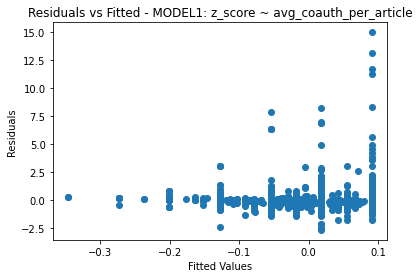

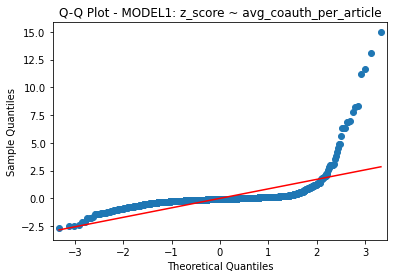


Top 5 influential points (Cook's Distance):
      dfb_const  dfb_avg_coauth_per_article   cooks_d  standard_resid  \
68     0.634413                   -0.497002  0.174235       17.504862   
2932   0.546503                   -0.428133  0.133943       15.347962   
384    0.481266                   -0.377026  0.106343       13.675583   
1226   0.460898                   -0.361069  0.098201       13.141591   
3205   0.333709                   -0.261429  0.053408        9.691524   

      hat_diag  dffits_internal  student_resid    dffits  
68    0.001136         0.590314      18.812556  0.634413  
2932  0.001136         0.517577      16.205727  0.546503  
384   0.001136         0.461180      14.271219  0.481266  
1226  0.001136         0.443172      13.667227  0.460898  
3205  0.001136         0.326826       9.895641  0.333709  


"\nModelling avg coath's effect on z-score.\nR = 0.008: very low, coauth doesn't affect z_dis much. Negative value -> more coauthors, lower z_dis\nStatistically significant (small p-value)\n\nVia residuals, higher z-score is harder to accurately predict (past 0.1)\nLack of normal distribution \n#68, 2931, 384, 1225, 3204 are highest Cook distance (most outlying)\nSevere right skew\n"

In [529]:

# MODEL1 Sub-model 1
X1 = with_zs[['avg_coauth_per_article']]
y = with_zs['z_score']
fit_and_diagnose(X1, y, "MODEL1: z_score ~ avg_coauth_per_article")

"""
Modelling avg coath's effect on z-score.
R = 0.008: very low, coauth doesn't affect z_dis much. Negative value -> more coauthors, lower z_dis
Statistically significant (small p-value)

Via residuals, higher z-score is harder to accurately predict (past 0.1)
Lack of normal distribution 
#68, 2931, 384, 1225, 3204 are highest Cook distance (most outlying)
Severe right skew
"""



MODEL1: z_score ~ citation + num_acknowledged

                            OLS Regression Results                            
Dep. Variable:                z_score   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.090
Date:                Wed, 19 Mar 2025   Prob (F-statistic):              0.336
Time:                        13:46:40   Log-Likelihood:                -2885.3
No. Observations:                2279   AIC:                             5777.
Df Residuals:                    2276   BIC:                             5794.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

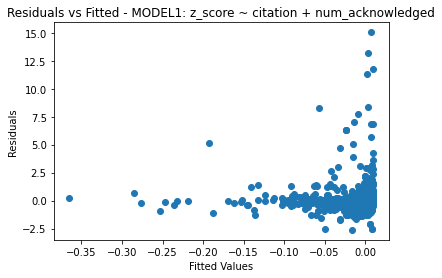

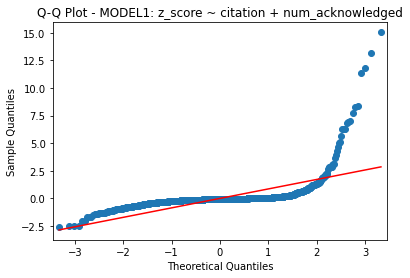


Top 5 influential points (Cook's Distance):
      dfb_const  dfb_citation  dfb_num_acknowledged   cooks_d  standard_resid  \
2317  -0.338181      1.142683             -0.371390  0.433999        6.088614   
906   -0.022106      0.449497             -0.084932  0.079870        9.669652   
68     0.435789     -0.198212              0.009080  0.057378       17.531520   
136    0.069723     -0.182454              0.358526  0.048723        5.873241   
2932   0.353717     -0.114361             -0.011110  0.039376       15.387057   

      hat_diag  dffits_internal  student_resid    dffits  
2317  0.033930         1.141051       6.137464  1.150206  
906   0.002556         0.489501       9.872443  0.499767  
68    0.000560         0.414892      18.846316  0.446007  
136   0.004220         0.382322       5.916960  0.385168  
2932  0.000499         0.343696      16.252203  0.363021  


"\nModelling citation + num_acknowledged's effect on z-score. \nR = 0.001: extremely low, these variables explain virtually nothing about z-score. \nNegative coefficients -> more citations/acknowledgments slightly lower z-score, but neither is statistically significant (high p-values: 0.174, 0.753)\n\nF-statistic (1.274) with p-value 0.280 shows model as a whole is not significant\n\nVia residuals, clear pattern of heteroscedasticity with major spread at higher fitted values (near 0)\nMultiple extreme outliers with residuals >10\nLack of normal distribution in Q-Q plot with severe deviation at upper tail\n\n#2316, 68, 136, 2931, 384 are highest Cook distance\nObservation #68 has extreme residual (17.43) and appears in both models\nSevere right skew (9.351) \n"

In [530]:

# MODEL1 Sub-model 2
X2 = with_zs[['citation', 'num_acknowledged']]
fit_and_diagnose(X2, y, "MODEL1: z_score ~ citation + num_acknowledged")

"""
Modelling citation + num_acknowledged's effect on z-score. 
R = 0.001: extremely low, these variables explain virtually nothing about z-score. 
Negative coefficients -> more citations/acknowledgments slightly lower z-score, but neither is statistically significant (high p-values: 0.174, 0.753)

F-statistic (1.274) with p-value 0.280 shows model as a whole is not significant

Via residuals, clear pattern of heteroscedasticity with major spread at higher fitted values (near 0)
Multiple extreme outliers with residuals >10
Lack of normal distribution in Q-Q plot with severe deviation at upper tail

#2316, 68, 136, 2931, 384 are highest Cook distance
Observation #68 has extreme residual (17.43) and appears in both models
Severe right skew (9.351) 
"""



MODEL1: z_score ~ citation + num_acknowledged + avg_coauth_per_article

                            OLS Regression Results                            
Dep. Variable:                z_score   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     6.940
Date:                Wed, 19 Mar 2025   Prob (F-statistic):           0.000120
Time:                        13:46:42   Log-Likelihood:                -2876.0
No. Observations:                2279   AIC:                             5760.
Df Residuals:                    2275   BIC:                             5783.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------

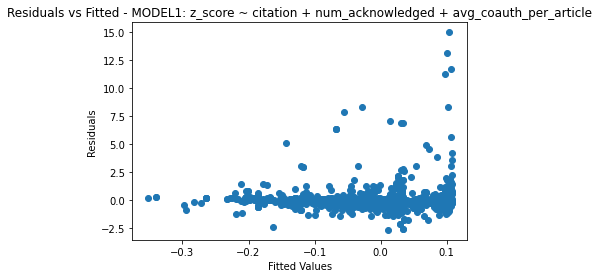

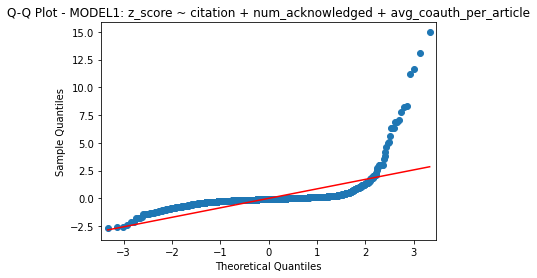


Top 5 influential points (Cook's Distance):
      dfb_const  dfb_citation  dfb_num_acknowledged  \
2317  -0.167438      1.138510             -0.373484   
68     0.657310     -0.179312             -0.019681   
2932   0.552877     -0.098055             -0.035925   
906    0.042872      0.452290             -0.089411   
384    0.511779     -0.109796             -0.092742   

      dfb_avg_coauth_per_article   cooks_d  standard_resid  hat_diag  \
2317                   -0.082785  0.323572        6.054158  0.034108   
68                     -0.493178  0.095521       17.492100  0.001247   
2932                   -0.426970  0.070245       15.338106  0.001193   
906                    -0.078816  0.061436        9.672886  0.002620   
384                    -0.378472  0.060169       13.658886  0.001288   

      dffits_internal  student_resid    dffits  
2317         1.137667       6.102183  1.146692  
68           0.618130      18.797989  0.664277  
2932         0.530077      16.194938  0.5596

"\nModelling citation + num_acknowledged + avg_coauth_per_article's effect on z-score. \nR = 0.010: very low, these variables together explain only 1% of z-score variance. \n\nModel as a whole is statistically significant (F-statistic: 7.093, p-value: 9.65e-05), driven primarily by avg_coauth_per_article\n- avg_coauth_per_article: significant negative effect (-0.0804, p=0.000) \n- citation: slight negative effect (-0.0001), not significant (p=0.223)\n- num_acknowledged: slight negative effect (-0.0030), not significant (p=0.552)\n\n#2316, 68, 2931, 384, 1225 are highest Cook distance\nObservation #68 consistently appears as extreme outlier across models (17.39)\nSame skewness (9.268) and kurtosis issues as previous models\n\nAdding avg_coauth_per_article improves model fit slightly compared to citation + num_acknowledged alone, but model remains poor overall\n"

In [531]:

# MODEL1 Sub-model 3
X3 = with_zs[['citation', 'num_acknowledged', 'avg_coauth_per_article']]
fit_and_diagnose(X3, y, "MODEL1: z_score ~ citation + num_acknowledged + avg_coauth_per_article")

"""
Modelling citation + num_acknowledged + avg_coauth_per_article's effect on z-score. 
R = 0.010: very low, these variables together explain only 1% of z-score variance. 

Model as a whole is statistically significant (F-statistic: 7.093, p-value: 9.65e-05), driven primarily by avg_coauth_per_article
- avg_coauth_per_article: significant negative effect (-0.0804, p=0.000) 
- citation: slight negative effect (-0.0001), not significant (p=0.223)
- num_acknowledged: slight negative effect (-0.0030), not significant (p=0.552)

#2316, 68, 2931, 384, 1225 are highest Cook distance
Observation #68 consistently appears as extreme outlier across models (17.39)
Same skewness (9.268) and kurtosis issues as previous models

Adding avg_coauth_per_article improves model fit slightly compared to citation + num_acknowledged alone, but model remains poor overall
"""



MODEL2: z_score ~ citation + num_acknowledged + avg_coauth_per_article + unique_coauthors

                            OLS Regression Results                            
Dep. Variable:                z_score   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     6.045
Date:                Wed, 19 Mar 2025   Prob (F-statistic):           7.77e-05
Time:                        13:46:44   Log-Likelihood:                -2874.3
No. Observations:                2279   AIC:                             5759.
Df Residuals:                    2274   BIC:                             5787.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

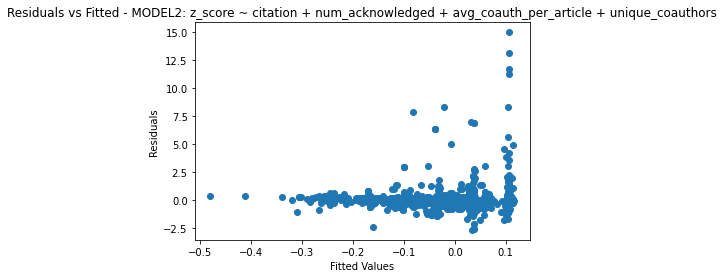

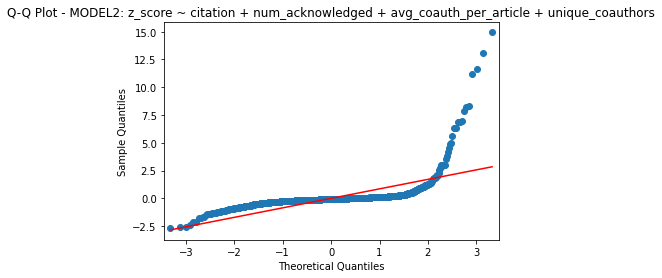


Top 5 influential points (Cook's Distance):
      dfb_const  dfb_citation  dfb_num_acknowledged  \
2317  -0.185004      1.235482             -0.104051   
68     0.655981     -0.155187             -0.005619   
2932   0.550704     -0.072678             -0.012131   
906    0.041320      0.433070             -0.064384   
384    0.512353     -0.107403             -0.090377   

      dfb_avg_coauth_per_article  dfb_unique_coauthors   cooks_d  \
2317                    0.304010             -0.532534  0.305209   
68                     -0.341196             -0.028552  0.076613   
2932                   -0.279634             -0.047706  0.056624   
906                    -0.031297             -0.038552  0.049414   
384                    -0.287176              0.015103  0.048241   

      standard_resid  hat_diag  dffits_internal  student_resid    dffits  
2317        5.918261  0.041750         1.235332       5.963061  1.244683  
68         17.498325  0.001249         0.618921      18.806360  0

"\nModelling citation + num_acknowledged + avg_coauth_per_article + unique_coauthors' effect on z-score. \nR = 0.011: very low, adding unique_coauthors barely improves model fit (0.1% increase).\n\nModel as a whole remains significant (F-statistic: 6.239, p-value: 5.45e-05), but individual predictors weaken:\n- avg_coauth_per_article: negative effect (-0.0476) now marginally significant (p=0.060)\n- unique_coauthors: negative effect (-0.0271) marginally significant (p=0.056)\n- citation: tiny negative effect (-3.625e-05), not significant (p=0.710)\n- num_acknowledged: switched to positive (0.0014), not significant (p=0.804)\n\nMulticollinearity likely present between avg_coauth_per_article and unique_coauthors (both measuring collaboration aspects)\n\n#2316, 68, 2931, 384, 1225 remain highest Cook distance\nSame observation #68 still extreme outlier (17.40)\n\nAdding unique_coauthors introduces potential collinearity without substantial improvement in model fit\n"

In [532]:

# MODEL2 Sub-model 4
X4 = with_zs[['citation', 'num_acknowledged', 'avg_coauth_per_article', 'unique_coauthors']]
fit_and_diagnose(X4, y, "MODEL2: z_score ~ citation + num_acknowledged + avg_coauth_per_article + unique_coauthors")

"""
Modelling citation + num_acknowledged + avg_coauth_per_article + unique_coauthors' effect on z-score. 
R = 0.011: very low, adding unique_coauthors barely improves model fit (0.1% increase).

Model as a whole remains significant (F-statistic: 6.239, p-value: 5.45e-05), but individual predictors weaken:
- avg_coauth_per_article: negative effect (-0.0476) now marginally significant (p=0.060)
- unique_coauthors: negative effect (-0.0271) marginally significant (p=0.056)
- citation: tiny negative effect (-3.625e-05), not significant (p=0.710)
- num_acknowledged: switched to positive (0.0014), not significant (p=0.804)

Multicollinearity likely present between avg_coauth_per_article and unique_coauthors (both measuring collaboration aspects)

#2316, 68, 2931, 384, 1225 remain highest Cook distance
Same observation #68 still extreme outlier (17.40)

Adding unique_coauthors introduces potential collinearity without substantial improvement in model fit
"""



MODEL2: z_score ~ citation + num_acknowledged + unique_coauthors

                            OLS Regression Results                            
Dep. Variable:                z_score   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     6.835
Date:                Wed, 19 Mar 2025   Prob (F-statistic):           0.000139
Time:                        13:46:49   Log-Likelihood:                -2876.1
No. Observations:                2279   AIC:                             5760.
Df Residuals:                    2275   BIC:                             5783.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

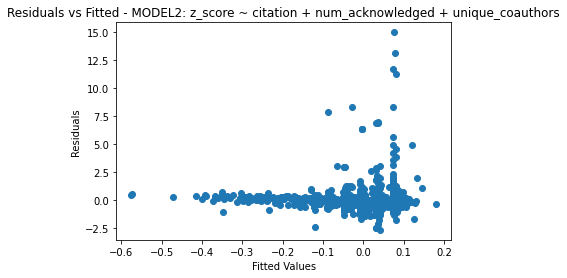

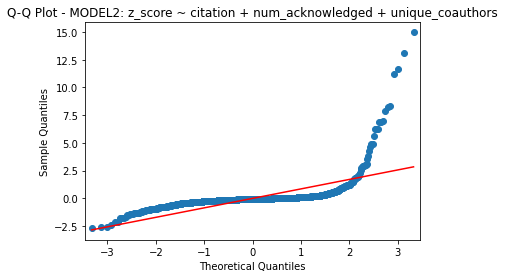


Top 5 influential points (Cook's Distance):
      dfb_const  dfb_citation  dfb_num_acknowledged  dfb_unique_coauthors  \
2317  -0.016364      1.173823             -0.212114             -0.435880   
68     0.561993     -0.077762              0.113372             -0.357988   
906    0.028675      0.452908             -0.057268             -0.081954   
2932   0.476529     -0.007607              0.084949             -0.326745   
136    0.179347     -0.102881              0.398347             -0.215998   

       cooks_d  standard_resid  hat_diag  dffits_internal  student_resid  \
2317  0.344845        5.809955  0.039259         1.174470       5.852257   
68    0.070721       17.519899  0.000921         0.531867      18.832519   
906   0.061537        9.671172  0.002625         0.496131       9.874153   
2932  0.053381       15.362410  0.000904         0.462088      16.223567   
136   0.046449        5.739758  0.005608         0.431041       5.780503   

        dffits  
2317  1.183021  
6

In [533]:
XX = with_zs[['citation', 'num_acknowledged', 'unique_coauthors']]
fit_and_diagnose(XX, y, "MODEL2: z_score ~ citation + num_acknowledged + unique_coauthors")


MODEL2: log(z_score) ~ log(citation) + log(num_acknowledged + 1) + log(coauthor)

                            OLS Regression Results                            
Dep. Variable:                z_score   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     13.76
Date:                Wed, 19 Mar 2025   Prob (F-statistic):           6.80e-09
Time:                        13:46:52   Log-Likelihood:                -2865.9
No. Observations:                2279   AIC:                             5740.
Df Residuals:                    2275   BIC:                             5763.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------

<ipython-input-534-3d846e3f233a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  with_zs['log_citation'] = np.log1p(with_zs['citation'])  # log(1 + citations)
<ipython-input-534-3d846e3f233a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  with_zs['log_ack'] = np.log1p(with_zs['num_acknowledged'])  # log(1 + num_acknowledged)
<ipython-input-534-3d846e3f233a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

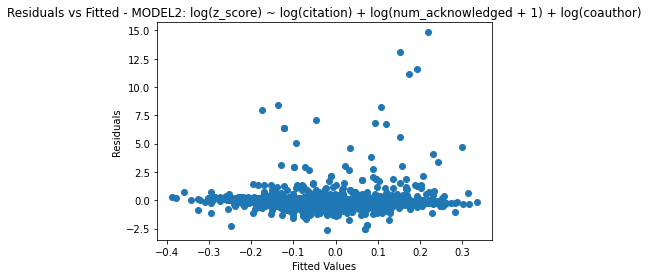

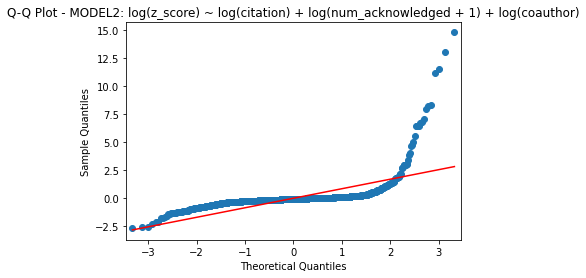


Top 5 influential points (Cook's Distance):
      dfb_const  dfb_log_citation  dfb_log_ack  dfb_log_coauthor   cooks_d  \
68     0.759519         -0.481618     0.385612         -0.473203  0.174964   
2932   0.255510          0.053155     0.193423         -0.547341  0.097104   
1226   0.264248         -0.026737     0.330498         -0.478796  0.089126   
384    0.524033         -0.279841     0.005998         -0.313954  0.087038   
136    0.303345         -0.259236     0.428304         -0.182695  0.061272   

      standard_resid  hat_diag  dffits_internal  student_resid    dffits  
68         17.444905  0.002294         0.836573      18.739427  0.898652  
2932       15.348195  0.001646         0.623231      16.206820  0.658096  
1226       13.111495  0.002069         0.597081      13.633854  0.620868  
384        13.624163  0.001872         0.590045      14.213339  0.615562  
136         5.563004  0.007857         0.495065       5.600000  0.498357  


"\nModelling log transformations' effect on z-score. \nR = 0.009: still very low, log transformations only slightly improve fit.\n\nModel as a whole is significant (F-statistic: 10.20, p-value: 3.88e-05):\n- log_citation: significant negative effect (-0.0746, p=0.000)\n- log_ack: positive effect (0.0285), not significant (p=0.281)\n\nLog transformations slightly improve model fit compared to untransformed citation + num_acknowledged (R² 0.009 vs 0.001)\n\nVia residuals, more even spread across fitted values range (-0.3 to 0.3)\nStill has many extreme outliers with residuals >10\nQ-Q plot continues to show severe deviation from normality\n\n#68, 384, 136, 2316, 1225 are highest Cook distance\nObservation #68 remains extreme outlier across all models (17.37)\nSame severe skewness (9.403) and kurtosis (124.106) issues\n\nLog transformations somewhat help with linearity but don't solve fundamental issues with outliers and non-normality\n"

In [534]:
import numpy as np
# MODEL2 Sub-model 5 (Log-transformed predictors)
with_zs['log_citation'] = np.log1p(with_zs['citation'])  # log(1 + citations)
with_zs['log_ack'] = np.log1p(with_zs['num_acknowledged'])  # log(1 + num_acknowledged)
with_zs['log_coauthor'] = np.log1p(with_zs['unique_coauthors'])  # log(1 + num_acknowledged)
with_zs['log_z'] = np.log1p(with_zs["z_score"])
X5 = with_zs[['log_citation', 'log_ack', 'log_coauthor']]
fit_and_diagnose(X5, y, "MODEL2: log(z_score) ~ log(citation) + log(num_acknowledged + 1) + log(coauthor)")

"""
Modelling log transformations' effect on z-score. 
R = 0.009: still very low, log transformations only slightly improve fit.

Model as a whole is significant (F-statistic: 10.20, p-value: 3.88e-05):
- log_citation: significant negative effect (-0.0746, p=0.000)
- log_ack: positive effect (0.0285), not significant (p=0.281)

Log transformations slightly improve model fit compared to untransformed citation + num_acknowledged (R² 0.009 vs 0.001)

Via residuals, more even spread across fitted values range (-0.3 to 0.3)
Still has many extreme outliers with residuals >10
Q-Q plot continues to show severe deviation from normality

#68, 384, 136, 2316, 1225 are highest Cook distance
Observation #68 remains extreme outlier across all models (17.37)
Same severe skewness (9.403) and kurtosis (124.106) issues

Log transformations somewhat help with linearity but don't solve fundamental issues with outliers and non-normality
"""

In [535]:
with_zs["z_score"].describe()

count    2279.000000
mean       -0.005906
std         0.858802
min        -2.641070
25%        -0.171318
50%        -0.054434
75%         0.001368
max        15.058498
Name: z_score, dtype: float64

In [536]:

# Check VIF for multicollinearity (example for Sub-model 3)
from statsmodels.stats.outliers_influence import variance_inflation_factor
def check_vif(X):
    X = sm.add_constant(X)
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    print(f"\nVIF for {X.columns.tolist()}:")
    print(vif)

check_vif(X3)

"""
Modelling VIF values for citation + num_acknowledged + avg_coauth_per_article model.
VIF measures multicollinearity: how much the variance of a coefficient estimate is increased due to correlation with other predictors. 

Values:
- 'const': 3.00
- 'citation': 1.14
- 'num_acknowledged': 1.14
- 'avg_coauth_per_article': 1.00

All VIF values are low (< 5), indicating minimal multicollinearity concerns. 
This suggests multicollinearity is not a problem in this model, and poor model performance is due to other issues (outliers, non-normality, misspecification).
"""


VIF for ['const', 'citation', 'num_acknowledged', 'avg_coauth_per_article']:
                 Variable       VIF
0                   const  2.968500
1                citation  1.127831
2        num_acknowledged  1.130108
3  avg_coauth_per_article  1.003755


"\nModelling VIF values for citation + num_acknowledged + avg_coauth_per_article model.\nVIF measures multicollinearity: how much the variance of a coefficient estimate is increased due to correlation with other predictors. \n\nValues:\n- 'const': 3.00\n- 'citation': 1.14\n- 'num_acknowledged': 1.14\n- 'avg_coauth_per_article': 1.00\n\nAll VIF values are low (< 5), indicating minimal multicollinearity concerns. \nThis suggests multicollinearity is not a problem in this model, and poor model performance is due to other issues (outliers, non-normality, misspecification).\n"

In [537]:
"""
- authors missing disruption scores
- authors missing? in ack_data set 
- set difference of acknowledgements
- explore the severe outliers
- other vars (mentor index, years since phd, ...) from ack_data
"""

'\n- authors missing disruption scores\n- authors missing? in ack_data set \n- set difference of acknowledgements\n- explore the severe outliers\n- other vars (mentor index, years since phd, ...) from ack_data\n'


MODEL1: ack ~ coauth

                            OLS Regression Results                            
Dep. Variable:       num_acknowledged   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     398.8
Date:                Wed, 19 Mar 2025   Prob (F-statistic):           6.93e-82
Time:                        13:46:54   Log-Likelihood:                -6255.0
No. Observations:                2279   AIC:                         1.251e+04
Df Residuals:                    2277   BIC:                         1.253e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            

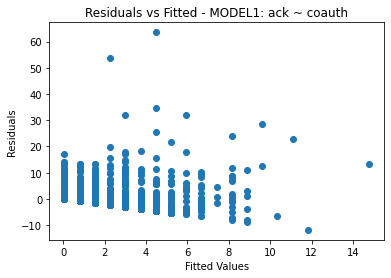

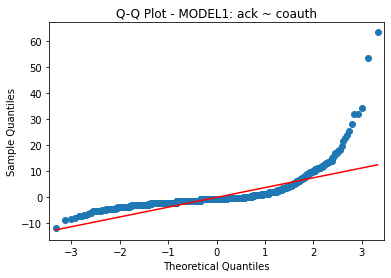


Top 5 influential points (Cook's Distance):
      dfb_const  dfb_unique_coauthors   cooks_d  standard_resid  hat_diag  \
3650  -0.464697              0.819780  0.340442        7.581575  0.011707   
2031  -0.461323              0.783798  0.310619        6.134694  0.016239   
717   -0.213779              0.681634  0.265978       16.884228  0.001863   
1662  -0.394685              0.634960  0.203433        3.571367  0.030913   
3148  -0.298621              0.557823  0.161831        6.359699  0.007939   

      dffits_internal  student_resid    dffits  
3650         0.825156       7.677433  0.835589  
2031         0.788186       6.184670  0.794607  
717          0.729353      18.048083  0.779628  
1662         0.637861       3.580625  0.639515  
3148         0.568913       6.415536  0.573908  


In [538]:
X6 = with_zs[['unique_coauthors']]
y2 = with_zs['num_acknowledged']
fit_and_diagnose(X6, y2, "MODEL1: ack ~ coauth")

In [539]:
"""
Regression models incorporating other variables (mentor index, first year).
Used first year rather than degree year because of presence of 9999's, wanted to ask how to approach that.
Used years since first year to serve as "years of experience" in dataset.
Used gender.
"""

'\nRegression models incorporating other variables (mentor index, first year).\nUsed first year rather than degree year because of presence of 9999\'s, wanted to ask how to approach that.\nUsed years since first year to serve as "years of experience" in dataset.\nUsed gender.\n'

In [540]:
with_zs_norm = with_zs[with_zs['z_score'] < 5]
with_zs_norm



,egoname,author,num_acknowledged,num_authored,indegree,outdegree,total_coauthors,unique_coauthors,citation,z_score,mentor_index,avg_coauth_per_article,log_citation,log_ack,log_coauthor,log_z
2,Zan Strabac,Zan Strabac,0,1,0,0,1,1,226.0,-0.420426,0.000000,1.000000,5.424950,0.000000,0.693147,-0.545462
4,Sarah R. Crissey,Sarah R. Crissey,2,3,5,4,4,3,239.0,-0.232789,-3.000000,1.333333,5.480639,1.098612,1.386294,-0.264994
5,Peter L. Callero,Peter L. Callero,2,1,4,1,0,0,132.0,0.087922,0.000000,0.000000,4.890349,1.098612,0.000000,0.084270
6,Edward D. Lowe,Edward D. Lowe,0,1,0,1,3,3,71.0,0.010820,-0.666667,3.000000,4.276666,0.000000,1.386294,0.010762
7,N. Anand,N. Anand,1,1,2,15,1,1,269.0,-0.171165,-1.000000,1.000000,5.598422,0.693147,0.693147,-0.187734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3932,Bradford Verter,Bradford Verter,0,1,0,3,0,0,114.0,0.228852,0.000000,0.000000,4.744932,0.000000,0.000000,0.206080
3934,Olav Sorenson,Olav Sorenson,9,4,11,7,3,3,50.0,-0.027126,1.000000,0.750000,3.931826,2.302585,1.386294,-0.027501
3935,Edgar Kiser,Edgar Kiser,14,4,18,12,5,4,27.0,-0.064589,1.750000,1.250000,3.332205,2.708050,1.609438,-0.066769
3937,Philippe Monin,Philippe Monin,0,2,0,9,4,2,225.0,-0.345462,-3.000000,2.000000,5.420535,0.000000,1.098612,-0.423825



MODEL2: log(z_score) ~ log(citation) + log(num_acknowledged + 1) + log(coauthor)

                            OLS Regression Results                            
Dep. Variable:                z_score   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     10.62
Date:                Wed, 12 Mar 2025   Prob (F-statistic):           4.24e-10
Time:                        16:38:45   Log-Likelihood:                -1439.9
No. Observations:                2264   AIC:                             2892.
Df Residuals:                    2258   BIC:                             2926.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------

<ipython-input-427-2c9cd3a89d5b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  with_zs_norm['log_outdegree'] = np.log1p(with_zs_norm['outdegree'] + 1)
<ipython-input-427-2c9cd3a89d5b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  with_zs_norm['log_indegree'] = np.log1p(with_zs_norm['indegree'] + 1)


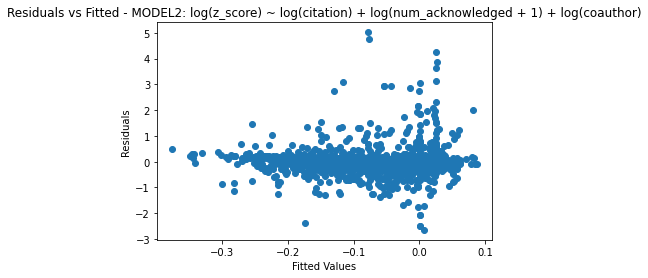

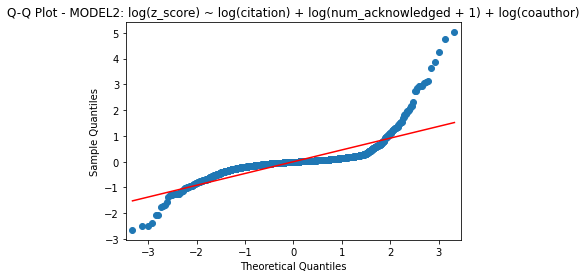


Top 5 influential points (Cook's Distance):
      dfb_const  dfb_citation  dfb_unique_coauthors  dfb_mentor_index  \
2317   0.381759      2.351784             -0.765916         -0.179580   
3694   0.082181      0.368982             -0.372055          0.111852   
1656  -0.094886     -0.534405              0.117076          0.080506   
2531  -0.018446     -0.453976              0.022412         -0.053803   
909   -0.224087      0.081751             -0.194839          0.087683   

      dfb_log_outdegree  dfb_log_indegree   cooks_d  standard_resid  hat_diag  \
2317          -0.584401          0.001550  0.908088       11.212710  0.041537   
3694           0.407665         -0.333790  0.074068       10.388146  0.004101   
1656           0.095712          0.089132  0.048789       -2.587578  0.041889   
2531          -0.019404          0.145303  0.040016       -1.975311  0.057966   
909            0.380596          0.003354  0.039763        6.028356  0.006522   

      dffits_internal  studen

In [ ]:
with_zs_norm['log_outdegree'] = np.log1p(with_zs_norm['outdegree'] + 1) 
with_zs_norm['log_indegree'] = np.log1p(with_zs_norm['indegree'] + 1) 

Xxxxx = with_zs_norm[['citation', 'unique_coauthors', 'mentor_index', 'log_outdegree', 'log_indegree']]
yyyyy = with_zs_norm['z_score']
fit_and_diagnose(Xxxxx, yyyyy, "MODEL2: log(z_score) ~ log(citation) + log(num_acknowledged + 1) + log(coauthor)")

In [542]:
with_add_vars = with_zs.copy()

# Join mentor_index, gender, and firstyear from ack_data
with_add_vars = with_add_vars.merge(
    ack_data[['egoname', 'mentor_index', 'gender', 'firstyear']],
    left_on='egoname',
    right_on='egoname',
    how='left'
)

# Calculate years of experience (using 2009 as the end year)
with_add_vars['years_experience'] = 2009 - with_add_vars['firstyear']

# Create dummy variable for gender (1 for female, 0 for male/blank)
with_add_vars['female'] = (with_add_vars['gender'] == 'F').astype(int)

# Filter out rows with missing values
with_add_vars_clean = with_add_vars.dropna(subset=['mentor_index', 'years_experience', 'z_score'])

KeyError: ['mentor_index']

In [ ]:
X_years = with_add_vars_clean[['years_experience']]
fit_and_diagnose(X_years, y, "MODEL3.1: z_score ~ years_experience")

Error: Insufficient data for MODEL3.1: z_score ~ years_experience


In [ ]:
X_gender = with_add_vars_clean[['female']]
fit_and_diagnose(X_gender, y, "MODEL3.2: z_score ~ female")

Error: Insufficient data for MODEL3.2: z_score ~ female


In [ ]:
X_mentor = with_add_vars_clean[['mentor_index']]
fit_and_diagnose(X_mentor, y, "MODEL3.3: z_score ~ mentor_index")

Error: Insufficient data for MODEL3.3: z_score ~ mentor_index


In [543]:
# Identify both high and low z-score outliers
high_outliers = with_zs[with_zs['z_score'] > 5].sort_values('z_score', ascending=False)
low_outliers = with_zs[with_zs['z_score'] < -2].sort_values('z_score')

print(f"Found {len(high_outliers)} high outliers (z_score > 5)")
print(f"Found {len(low_outliers)} low outliers (z_score < -2)")

# Function to retrieve detailed article data for an author
def get_author_articles(author_name):
    # Get DOIs of articles written by this author
    author_dois = unique_author_disruptions[unique_author_disruptions['author'] == author_name]['DI'].tolist()
    
    if not author_dois:
        return pd.DataFrame()
    
    # Retrieve full article data from merged_df
    articles_data = merged_df[merged_df['DI'].isin(author_dois)].copy()
    
    # Select and rename relevant columns for readability
    selected_columns = [
        'DI', 'journal', 'year', 'disruption', 'citation', 
        'aut_num', 'ack_num', 'com_num', 'aut_jaccard',
        'ack_jaccard', 'com_jaccard'
    ]
    
    # Make sure all columns exist
    existing_columns = [col for col in selected_columns if col in articles_data.columns]
    
    if not existing_columns:
        return pd.DataFrame()
    
    # Return a clean dataframe with just the data we need
    return articles_data[existing_columns].drop_duplicates()

Found 15 high outliers (z_score > 5)
Found 6 low outliers (z_score < -2)


In [544]:
# SECTION 1: Display high outlier authors overview
if len(high_outliers) > 0:
    print("\n==== HIGH OUTLIER AUTHORS ====")
    print(high_outliers[['egoname', 'z_score', 'citation', 'num_acknowledged', 'num_authored']].head(5))


==== HIGH OUTLIER AUTHORS ====
                 egoname    z_score  citation  num_acknowledged  num_authored
68         Rosanna Hertz  15.058498       9.0                 1             2
2932    Michel Grossetti  13.214294      45.0                 1             2
384     Robert W. Witkin  11.784368       9.0                 0             1
1226  Anthony Oberschall  11.327792      41.0                 2             1
3205      Austin T. Turk   8.377898      73.0                 0             1


In [545]:
# SECTION 2: Analyze first high outlier
if len(high_outliers) > 0:
    outlier = high_outliers.iloc[0]
    author = outlier['egoname']
    z_score = outlier['z_score']
    
    print(f"\n==== ARTICLES BY TOP HIGH OUTLIER: {author} (z-score: {z_score:.2f}) ====")
    
    articles = get_author_articles(author)
    if len(articles) > 0:
        # Sort by disruption score to see impact
        print(articles.sort_values('disruption', ascending=False).to_string(index=False))
        
        # Summary statistics
        print(f"\nSummary for {author}:")
        print(f"- Total articles: {len(articles)}")
        print(f"- Average disruption: {articles['disruption'].mean():.4f}")
        print(f"- Max disruption: {articles['disruption'].max():.4f}")
        print(f"- Total citations: {articles['citation'].sum()}")
    else:
        print(f"No article data found for {author}")


==== ARTICLES BY TOP HIGH OUTLIER: Rosanna Hertz (z-score: 15.06) ====
                              DI  year  disruption  citation
10.1111/j.1741-3737.2006.00293.x  2006        0.25       9.0

Summary for Rosanna Hertz:
- Total articles: 1
- Average disruption: 0.2500
- Max disruption: 0.2500
- Total citations: 9.0


In [546]:
# SECTION 3: Analyze second high outlier
if len(high_outliers) > 1:
    outlier = high_outliers.iloc[1]
    author = outlier['egoname']
    z_score = outlier['z_score']
    
    print(f"\n==== ARTICLES BY SECOND HIGH OUTLIER: {author} (z-score: {z_score:.2f}) ====")
    
    articles = get_author_articles(author)
    if len(articles) > 0:
        print(articles.sort_values('disruption', ascending=False).to_string(index=False))
        
        # Summary statistics
        print(f"\nSummary for {author}:")
        print(f"- Total articles: {len(articles)}")
        print(f"- Average disruption: {articles['disruption'].mean():.4f}")
        print(f"- Max disruption: {articles['disruption'].max():.4f}")
        print(f"- Total citations: {articles['citation'].sum()}")
    else:
        print(f"No article data found for {author}")


==== ARTICLES BY SECOND HIGH OUTLIER: Michel Grossetti (z-score: 13.21) ====
                          DI  year  disruption  citation
10.1016/j.socnet.2004.11.004  2005    0.219388      45.0
10.1016/j.socnet.2007.01.005  2007         NaN       NaN

Summary for Michel Grossetti:
- Total articles: 2
- Average disruption: 0.2194
- Max disruption: 0.2194
- Total citations: 45.0


In [547]:
# SECTION 4: Analyze third high outlier
if len(high_outliers) > 2:
    outlier = high_outliers.iloc[2]
    author = outlier['egoname']
    z_score = outlier['z_score']
    
    print(f"\n==== ARTICLES BY THIRD HIGH OUTLIER: {author} (z-score: {z_score:.2f}) ====")
    
    articles = get_author_articles(author)
    if len(articles) > 0:
        print(articles.sort_values('disruption', ascending=False).to_string(index=False))
        
        # Summary statistics
        print(f"\nSummary for {author}:")
        print(f"- Total articles: {len(articles)}")
        print(f"- Average disruption: {articles['disruption'].mean():.4f}")
        print(f"- Max disruption: {articles['disruption'].max():.4f}")
        print(f"- Total citations: {articles['citation'].sum()}")
    else:
        print(f"No article data found for {author}")


==== ARTICLES BY THIRD HIGH OUTLIER: Robert W. Witkin (z-score: 11.78) ====
                     DI  year  disruption  citation
10.1111/0735-2751.00092  2000    0.195652       9.0

Summary for Robert W. Witkin:
- Total articles: 1
- Average disruption: 0.1957
- Max disruption: 0.1957
- Total citations: 9.0


In [548]:
# SECTION 5: Low outlier authors overview
if len(low_outliers) > 0:
    print("\n==== LOW OUTLIER AUTHORS ====")
    print(low_outliers[['egoname', 'z_score', 'citation', 'num_acknowledged', 'num_authored']].head(5))


==== LOW OUTLIER AUTHORS ====
             egoname   z_score  citation  num_acknowledged  num_authored
3100  Steven A. Tuch -2.641070     249.0                 1             1
3767       Peng Wang -2.560676     614.0                 0             3
648        Ted Palys -2.512667      15.0                 0             2
2159     John Lowman -2.512667      15.0                 0             2
1325      Gwen Sharp -2.087067      26.0                 1             1


In [549]:
# SECTION 6: Analyze first low outlier
if len(low_outliers) > 0:
    outlier = low_outliers.iloc[0]
    author = outlier['egoname']
    z_score = outlier['z_score']
    
    print(f"\n==== ARTICLES BY TOP LOW OUTLIER: {author} (z-score: {z_score:.2f}) ====")
    
    articles = get_author_articles(author)
    if len(articles) > 0:
        print(articles.sort_values('disruption').to_string(index=False))
        
        # Summary statistics
        print(f"\nSummary for {author}:")
        print(f"- Total articles: {len(articles)}")
        print(f"- Average disruption: {articles['disruption'].mean():.4f}")
        print(f"- Min disruption: {articles['disruption'].min():.4f}")
        print(f"- Total citations: {articles['citation'].sum()}")
    else:
        print(f"No article data found for {author}")


==== ARTICLES BY TOP LOW OUTLIER: Steven A. Tuch (z-score: -2.64) ====
                   DI  year  disruption  citation
10.1353/sof.2005.0050  2005   -0.043798     249.0

Summary for Steven A. Tuch:
- Total articles: 1
- Average disruption: -0.0438
- Min disruption: -0.0438
- Total citations: 249.0


In [550]:
# SECTION 7: Overall comparison between groups
print("\n==== COMPARISON: HIGH vs LOW vs NORMAL ====")
normal_authors = with_zs[(with_zs['z_score'] <= 5) & (with_zs['z_score'] >= -2)]

comparison_metrics = ['citation', 'num_acknowledged', 'num_authored', 'indegree', 'outdegree']
high_means = high_outliers[comparison_metrics].mean()
low_means = low_outliers[comparison_metrics].mean()
normal_means = normal_authors[comparison_metrics].mean()

comparison_df = pd.DataFrame({
    'High Outliers': high_means,
    'Normal Authors': normal_means,
    'Low Outliers': low_means
})

print(comparison_df)

"""
Compares average metrics between high outliers (z_score > 5), 
normal authors (-2 <= z_score <= 5), and low outliers (z_score < -2).
Displays mean values for key variables like citation count,
acknowledgments, authored papers, and network metrics (indegree/outdegree)
to identify patterns that distinguish highly disruptive authors from others.
"""


==== COMPARISON: HIGH vs LOW vs NORMAL ====
                  High Outliers  Normal Authors  Low Outliers
citation             155.400000      129.397697    157.500000
num_acknowledged       1.333333        1.633304      0.500000
num_authored           1.400000        1.890611      1.666667
indegree               1.866667        2.417626      0.666667
outdegree              1.066667        2.569531      0.000000


'\nCompares average metrics between high outliers (z_score > 5), \nnormal authors (-2 <= z_score <= 5), and low outliers (z_score < -2).\nDisplays mean values for key variables like citation count,\nacknowledgments, authored papers, and network metrics (indegree/outdegree)\nto identify patterns that distinguish highly disruptive authors from others.\n'

In [551]:
# Get all unique authors from author_stats
all_authors_stats = set(author_stats['anglicized_author'].dropna().tolist())
print(f"Total unique authors in author_stats: {len(all_authors_stats)}")

# Get all unique authors from ack_data
all_authors_ack = set(ack_data['egoname'].dropna().tolist())
print(f"Total unique authors in ack_data: {len(all_authors_ack)}")

# Find authors in author_stats that are not in ack_data
missing_from_ack = all_authors_stats - all_authors_ack
print(f"Found {len(missing_from_ack)} authors in author_stats that are not in ack_data")

# Print some examples of missing authors
if len(missing_from_ack) > 0:
    print("\nSample of authors missing from ack_data:")
    for author in list(missing_from_ack)[:10]:  # Show first 10 as example
        print(f"- {author}")
    
    # Get statistics for these missing authors
    missing_authors_stats = author_stats[author_stats['author'].isin(missing_from_ack)]
    print("\nStatistics for authors missing from ack_data:")
    print(missing_authors_stats[['mean_disruption', 'median_disruption', 'z_score']].describe())
else:
    print("\nAll authors in author_stats are also in ack_data.")

Total unique authors in author_stats: 3886
Total unique authors in ack_data: 3933
Found 1215 authors in author_stats that are not in ack_data

Sample of authors missing from ack_data:
- Alan Agresti
- Lawrence E. Cohen
- Gonul Dogan
- Mary Klute
- Hiram E. Fitzgerald
- Stephen R. Marks
- Shelley MacDermid Wadsworth
- Benjamin D. Brewer
- Melissa J. Wilde
- Melissa A. Hardy

Statistics for authors missing from ack_data:
       mean_disruption  median_disruption     z_score
count       759.000000         759.000000  759.000000
mean          0.000354           0.000233    0.018807
std           0.022329           0.021764    1.345216
min          -0.050341          -0.050341   -3.035261
25%          -0.002507          -0.002408   -0.153558
50%          -0.000780          -0.000759   -0.049512
75%           0.000000           0.000000   -0.002500
max           0.425926           0.425926   25.656978


In [554]:
set_diff_df = pd.read_csv('only_coauth_and_only_acknowledged.txt', sep='\t')
set_diff_df['author'] = set_diff_df['author'].apply(clean_and_anglicize)

set_diff_df

,author,coauthors,acknowledged,only_coauth,only_ack,N_only_coauth,N_only_ack
0,Akos Rona Tas,{'Alya Guseva'},"{'Paul DiMaggio', 'Maria Charles', 'David Star...",{'Alya Guseva'},"{'Paul DiMaggio', 'Maria Charles', 'David Star...",1,4
1,Ozgecan Kocak,"{'Mike Hannan', 'Greta Hsu', 'Glenn Carroll'}","{'Mike Hannan', 'Hayagreeva Rao', 'Glenn Carro...",{'Greta Hsu'},"{'Susan Olzak', 'Ezra Zuckerman', 'Hayagreeva ...",1,4
2,Oystein Kravdal,{'Ronald Rindfuss'},"{'Aart C. Liefbroer', 'Paula England', 'Philip...",{'Ronald Rindfuss'},"{'Aart C. Liefbroer', 'Paula England', 'Philip...",1,5
3,A Guadalupe Rami,{'Jos&#233; Ramiro Caballero Hoyos'},set(),{'Jos&#233; Ramiro Caballero Hoyos'},set(),1,0
4,A. Aassve,"{'D. Mendola', 'A. Busetta'}",set(),"{'D. Mendola', 'A. Busetta'}",set(),2,0
...,...,...,...,...,...,...,...
3562,Yang Chih Fu,set(),"{'Karen Cook', 'Nan Lin'}",set(),"{'Karen Cook', 'Nan Lin'}",0,2
3563,Yoshinori Kamo,set(),{'Scott L. Feld'},set(),{'Scott L. Feld'},0,1
3564,Yusheng Peng,set(),"{'Andrew Walder', 'Deborah Davis', 'Alisa Lewi...",set(),"{'Xueguang Zhou', 'Andrew Walder', 'Alisa Lewi...",0,6
3565,Yuval Elmelech,set(),{'Seymour Spilerman'},set(),{'Seymour Spilerman'},0,1


In [570]:

# Step 2: Merge with the existing author dataframe
n_only_df = with_zs_norm.merge(
    set_diff_df[['author', 'N_only_coauth', 'N_only_ack']],
    left_on='author',
    right_on='author',
    how='left'
)

# Filter out rows with missing disruption data
model_df = n_only_df.dropna(subset=['z_score', 'citation', 'mentor_index', 'indegree', 
                                     'outdegree', 'N_only_coauth', 'N_only_ack', 'log_z'])

model_df

,egoname,author,num_acknowledged,num_authored,indegree,outdegree,total_coauthors,unique_coauthors,citation,z_score,mentor_index,avg_coauth_per_article,log_citation,log_ack,log_coauthor,log_z,ack_sq,N_only_coauth,N_only_ack
0,Zan Strabac,Zan Strabac,0,1,0,0,1,1,226.0,-0.420426,0.000000,1.000000,5.424950,0.000000,0.693147,-0.545462,0,1.0,0.0
1,Sarah R. Crissey,Sarah R. Crissey,2,3,5,4,4,3,239.0,-0.232789,-3.000000,1.333333,5.480639,1.098612,1.386294,-0.264994,4,2.0,3.0
2,Peter L. Callero,Peter L. Callero,2,1,4,1,0,0,132.0,0.087922,0.000000,0.000000,4.890349,1.098612,0.000000,0.084270,4,0.0,1.0
3,Edward D. Lowe,Edward D. Lowe,0,1,0,1,3,3,71.0,0.010820,-0.666667,3.000000,4.276666,0.000000,1.386294,0.010762,0,3.0,1.0
4,N. Anand,N. Anand,1,1,2,15,1,1,269.0,-0.171165,-1.000000,1.000000,5.598422,0.693147,0.693147,-0.187734,1,1.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2259,Bradford Verter,Bradford Verter,0,1,0,3,0,0,114.0,0.228852,0.000000,0.000000,4.744932,0.000000,0.000000,0.206080,0,0.0,3.0
2260,Olav Sorenson,Olav Sorenson,9,4,11,7,3,3,50.0,-0.027126,1.000000,0.750000,3.931826,2.302585,1.386294,-0.027501,81,3.0,7.0
2261,Edgar Kiser,Edgar Kiser,14,4,18,12,5,4,27.0,-0.064589,1.750000,1.250000,3.332205,2.708050,1.609438,-0.066769,196,2.0,10.0
2262,Philippe Monin,Philippe Monin,0,2,0,9,4,2,225.0,-0.345462,-3.000000,2.000000,5.420535,0.000000,1.098612,-0.423825,0,2.0,9.0



MODEL1: z_score ~ citation + mentor + indeg + outdeg + coauth

                            OLS Regression Results                            
Dep. Variable:                z_score   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     4.514
Date:                Wed, 19 Mar 2025   Prob (F-statistic):           0.000430
Time:                        14:24:36   Log-Likelihood:                -837.65
No. Observations:                1835   AIC:                             1687.
Df Residuals:                    1829   BIC:                             1720.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

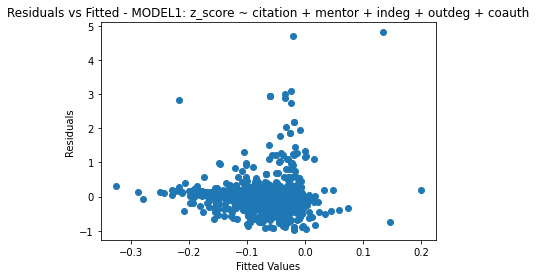

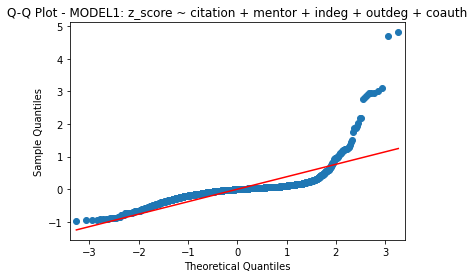


Top 5 influential points (Cook's Distance):
      dfb_const  dfb_citation  dfb_mentor_index  dfb_indegree  dfb_outdegree  \
1306   0.107753      3.024904         -0.205090     -0.228523      -0.876423   
496   -0.285167     -0.067852         -0.059873     -0.412686       1.200242   
2105   0.306438      0.439937          0.098474     -0.247894       0.191672   
1018   0.015619      0.096977         -0.074002      0.615833      -0.230035   
396   -0.014766      0.088757          0.060988     -0.527969       0.155429   

      dfb_N_only_coauth   cooks_d  standard_resid  hat_diag  dffits_internal  \
1306          -0.878136  1.419350       12.897286  0.048703         2.918236   
496           -0.017022  0.251583        7.514252  0.026038         1.228617   
2105          -0.430943  0.079428       12.274951  0.003153         0.690338   
1018          -0.119144  0.070449        3.359877  0.036092         0.650148   
396            0.071289  0.047242       -1.151226  0.176193        -0.5324

In [571]:

# Model 1: Y (z-score) ~ citation + mentor + indeg + outdeg + coauth
firstX = model_df[['citation', 'mentor_index', 'indegree', 'outdegree', 'N_only_coauth']]
firsty = model_df['z_score']
model1 = fit_and_diagnose(firstX, firsty, "MODEL1: z_score ~ citation + mentor + indeg + outdeg + coauth")



MODEL2: z_score ~ citation + (mentor * outdeg)

                            OLS Regression Results                            
Dep. Variable:                z_score   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.5621
Date:                Wed, 19 Mar 2025   Prob (F-statistic):              0.570
Time:                        14:24:38   Log-Likelihood:                -848.34
No. Observations:                1835   AIC:                             1703.
Df Residuals:                    1832   BIC:                             1719.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

<ipython-input-572-7313c13c12ad>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['mentor_outdeg'] = model_df['mentor_index'] * model_df['outdegree']


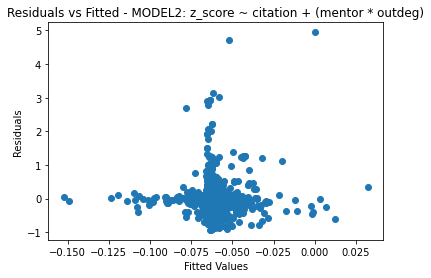

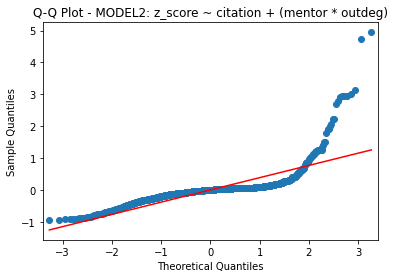


Top 5 influential points (Cook's Distance):
      dfb_const  dfb_citation  dfb_mentor_outdeg   cooks_d  standard_resid  \
1306  -1.190213      2.874422          -1.116386  2.528698       13.142957   
496    0.098685      0.032603           0.410518  0.077276        7.034048   
2105   0.056915      0.391920          -0.168728  0.074607       12.286996   
1495   0.175391     -0.407360           0.155462  0.055772       -1.620644   
567   -0.134443      0.381940          -0.174097  0.050342        2.944614   

      hat_diag  dffits_internal  student_resid    dffits  
1306  0.042069         2.754287      13.806376  2.893315  
496   0.004664         0.481486       7.129056  0.487989  
2105  0.001480         0.473096      12.823371  0.493749  
1495  0.059889        -0.409044      -1.621364 -0.409226  
567   0.017120         0.388622       2.950802  0.389439  


In [572]:

# Model 2: Y ~ cite + I(mentor * outdeg)
model_df['mentor_outdeg'] = model_df['mentor_index'] * model_df['outdegree']
secX = model_df[['citation', 'mentor_outdeg']]
model2 = fit_and_diagnose(secX, firsty, "MODEL2: z_score ~ citation + (mentor * outdeg)")



MODEL3: z_score ~ citation + (coauth * outdeg)

                            OLS Regression Results                            
Dep. Variable:                z_score   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     4.764
Date:                Wed, 19 Mar 2025   Prob (F-statistic):            0.00864
Time:                        14:24:39   Log-Likelihood:                -844.14
No. Observations:                1835   AIC:                             1694.
Df Residuals:                    1832   BIC:                             1711.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

<ipython-input-573-1988a27f5bc2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['coauth_outdeg'] = model_df['N_only_coauth'] * model_df['outdegree']


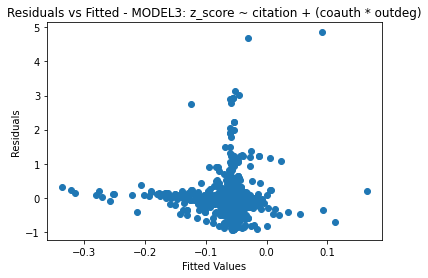

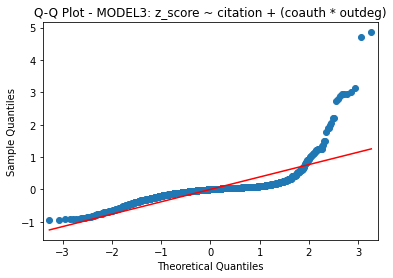


Top 5 influential points (Cook's Distance):
      dfb_const  dfb_citation  dfb_coauth_outdeg   cooks_d  standard_resid  \
1306  -0.879631      2.973594          -1.422435  2.714870       12.960126   
2105   0.110964      0.447962          -0.295758  0.092402       12.259388   
1495   0.158282     -0.497211           0.226567  0.083007       -1.900020   
496   -0.000434      0.002033           0.417630  0.080009        7.170257   
567   -0.090307      0.364989          -0.158548  0.045726        2.837062   

      hat_diag  dffits_internal  student_resid    dffits  
1306  0.046247         2.853876      13.594779  2.993630  
2105  0.001841         0.526504      12.791979  0.549378  
1495  0.064528        -0.499020      -1.901375 -0.499376  
496   0.004647         0.489926       7.271052  0.496813  
567   0.016757         0.370374       2.842539  0.371089  


In [573]:

# Model 3: Y ~ cite + (coauth * outdeg)
model_df['coauth_outdeg'] = model_df['N_only_coauth'] * model_df['outdegree']
thirdX = model_df[['citation', 'coauth_outdeg']]
model3 = fit_and_diagnose(thirdX, firsty, "MODEL3: z_score ~ citation + (coauth * outdeg)")



MODEL4: z_score ~ citation + N_only_coauth + N_only_ack

                            OLS Regression Results                            
Dep. Variable:                z_score   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     5.624
Date:                Wed, 19 Mar 2025   Prob (F-statistic):           0.000777
Time:                        14:24:40   Log-Likelihood:                -840.49
No. Observations:                1835   AIC:                             1689.
Df Residuals:                    1831   BIC:                             1711.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

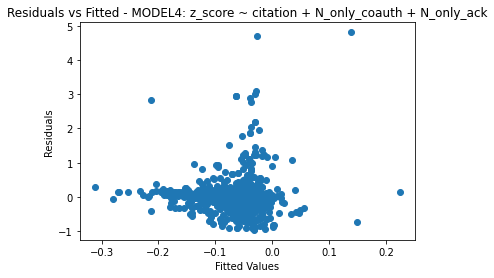

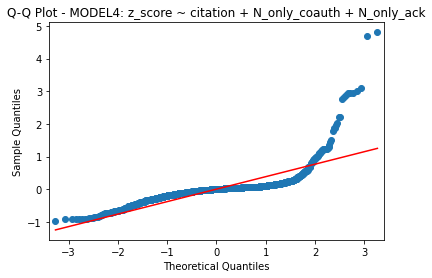


Top 5 influential points (Cook's Distance):
      dfb_const  dfb_citation  dfb_N_only_coauth  dfb_N_only_ack   cooks_d  \
1306   0.235084      2.971266          -1.028123       -1.040832  2.049399   
496   -0.308909     -0.140713          -0.103646        1.275891  0.416132   
2105   0.298323      0.412443          -0.473804        0.173039  0.107257   
1495  -0.009647     -0.518043           0.151734        0.167554  0.067660   
567    0.027812      0.352109          -0.146773       -0.040410  0.033370   

      standard_resid  hat_diag  dffits_internal  student_resid    dffits  
1306       12.863646  0.047202         2.863145      13.483847  3.001187  
496         7.507576  0.028685         1.290167       7.623784  1.310137  
2105       12.280268  0.002837         0.655003      12.816031  0.683580  
1495       -1.999819  0.063383        -0.520230      -2.001460 -0.520657  
567         2.812680  0.016592         0.365346       2.818007  0.366038  


In [574]:

# Model 4: Y ~ cite + N_only_coauth + N_only_ack
fourX = model_df[['citation', 'N_only_coauth', 'N_only_ack']]
model4 = fit_and_diagnose(fourX, firsty, "MODEL4: z_score ~ citation + N_only_coauth + N_only_ack")



MODEL5: z_score ~ citation + (N_only_coauth * N_only_ack)

                            OLS Regression Results                            
Dep. Variable:                z_score   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     4.559
Date:                Wed, 19 Mar 2025   Prob (F-statistic):             0.0106
Time:                        14:24:42   Log-Likelihood:                -844.35
No. Observations:                1835   AIC:                             1695.
Df Residuals:                    1832   BIC:                             1711.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------

<ipython-input-575-e8ac451b6132>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['coauth_ack_interaction'] = model_df['N_only_coauth'] * model_df['N_only_ack']


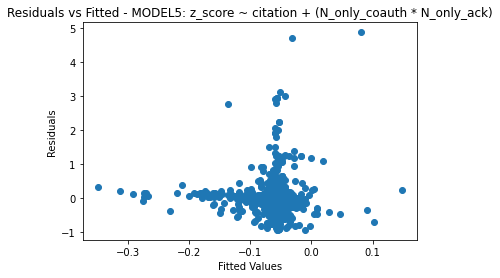

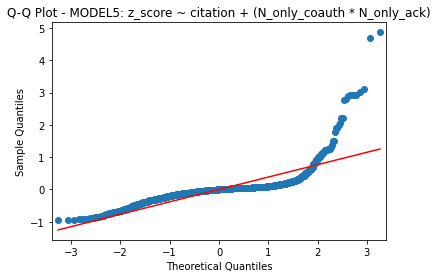


Top 5 influential points (Cook's Distance):
      dfb_const  dfb_citation  dfb_coauth_ack_interaction   cooks_d  \
1306  -0.862421      2.929454                   -1.323859  2.635403   
496   -0.019184     -0.018886                    0.505876  0.106672   
2105   0.114968      0.438966                   -0.282564  0.090094   
1495   0.152479     -0.483802                    0.210872  0.078636   
567   -0.088268      0.363059                   -0.151301  0.045265   

      standard_resid  hat_diag  dffits_internal  student_resid    dffits  
1306       12.978013  0.044836         2.811798      13.615440  2.949903  
496         7.205944  0.006125         0.565699       7.308294  0.573734  
2105       12.262392  0.001794         0.519887      12.795394  0.542485  
1495       -1.871109  0.063129        -0.485704      -1.872388 -0.486037  
567         2.848298  0.016463         0.368504       2.853847  0.369222  


In [575]:

# Model 5: Y ~ cite + (N_only_coauth * N_only_ack)
model_df['coauth_ack_interaction'] = model_df['N_only_coauth'] * model_df['N_only_ack']
fiveX = model_df[['citation', 'coauth_ack_interaction']]
model5 = fit_and_diagnose(fiveX, firsty, "MODEL5: z_score ~ citation + (N_only_coauth * N_only_ack)")



MODEL4: log z_score ~ citation + N_only_coauth + N_only_ack

                            OLS Regression Results                            
Dep. Variable:                  log_z   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     4.738
Date:                Wed, 19 Mar 2025   Prob (F-statistic):            0.00269
Time:                        14:24:43   Log-Likelihood:                -1080.7
No. Observations:                1835   AIC:                             2169.
Df Residuals:                    1831   BIC:                             2192.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

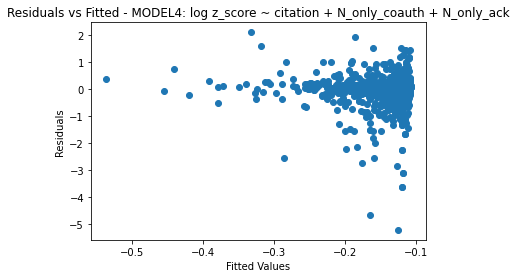

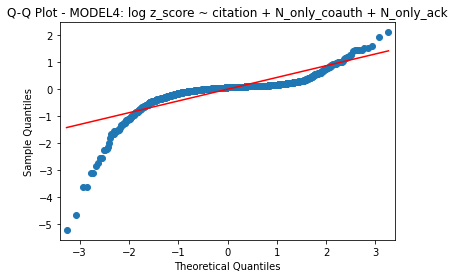


Top 5 influential points (Cook's Distance):
      dfb_const  dfb_citation  dfb_N_only_coauth  dfb_N_only_ack   cooks_d  \
1306   0.087095      1.100815          -0.380906       -0.385615  0.305089   
901    0.020291     -0.602505           0.208142       -0.051736  0.107443   
496   -0.151686     -0.069095          -0.050894        0.626510  0.102737   
1668   0.021546      0.628365          -0.206029       -0.207062  0.099472   
931   -0.214774      0.106118           0.294905       -0.475022  0.088777   

      standard_resid  hat_diag  dffits_internal  student_resid    dffits  
1306        4.963228  0.047202         1.104698       4.995590  1.111901  
901        -5.898913  0.012200        -0.655570      -5.954151 -0.661709  
496         3.730331  0.028685         0.641052       3.743565  0.643326  
1668        1.846656  0.104487         0.630784       1.847873  0.631200  
931       -10.698895  0.003093        -0.595908     -11.046847 -0.615288  


In [576]:
sixX = model_df[['citation', 'N_only_coauth', 'N_only_ack']]
model6 = fit_and_diagnose(sixX, model_df['log_z'], "MODEL4: log z_score ~ citation + N_only_coauth + N_only_ack")

In [577]:

n_only_df.to_csv('author_network_disruption_merged.csv', index=False)